# Capstone Project

CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

In this project, your task is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, you need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project.

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

In [3]:
# Importing Demographic dataset

demographic = pd.read_csv("Demographic data.csv")
demographic.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


##### Checking Demographics Data

In [4]:
# Summary of demographics data

demographic.shape

(71295, 12)

In [5]:
# Summary of demographics data

demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [6]:
# Summary of demographics data

demographic.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [7]:
# Checking the number of null values in each column

demographic.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [8]:
# Checking the percentage of missing values in each column

round(100*(demographic.isnull().sum()/len(demographic.index)), 2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

##### Checking Credit Bureau Data

In [9]:
# Import credit bureau dataset

credit_bureau = pd.read_csv("Credit Bureau data.csv")
credit_bureau.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [10]:
# Summary of Credit Bureau data

credit_bureau.shape

(71295, 19)

In [11]:
# Summary of Credit Bureau data

credit_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [12]:
# Summary of Credit Bureau data

credit_bureau.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [13]:
# Checking the missing values in each column

credit_bureau.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [14]:
# Checking the percentage of missing values in each column

round(100*(credit_bureau.isnull().sum()/len(credit_bureau.index)), 2)

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

##### Data Understanding and Preparation

In [15]:
demographic = demographic.drop_duplicates(subset=['Application ID'], keep='first', inplace=False) # Removing Duplicate apllications
demographic.shape

(71292, 12)

In [16]:
credit_bureau = credit_bureau.drop_duplicates(subset=['Application ID'], keep='first', inplace=False) # Removing Duplicate apllications
credit_bureau.shape

(71292, 19)

##### Analysing the demographics data

In [17]:
demographic_reject = demographic[demographic['Performance Tag'].isnull()]

credit_reject = credit_bureau[credit_bureau['Performance Tag'].isnull()]

In [18]:
# Removing records will null in performance tag

demographic = demographic[~demographic['Performance Tag'].isnull()]

credit_bureau = credit_bureau[~credit_bureau['Performance Tag'].isnull()]

In [19]:
demographic.shape

(69867, 12)

In [20]:
credit_bureau.shape

(69867, 19)

In [21]:
# changing type of target variable to int
    
demographic['Performance Tag'] = demographic['Performance Tag'].astype(int)

In [22]:
# Checking the null values again

demographic.isnull().sum()

Application ID                                   0
Age                                              0
Gender                                           2
Marital Status (at the time of application)      6
No of dependents                                 3
Income                                           0
Education                                      118
Profession                                      13
Type of residence                                8
No of months in current residence                0
No of months in current company                  0
Performance Tag                                  0
dtype: int64

###### Understanding data of column age

count    69867.000000
mean        44.995577
std          9.930092
min         -3.000000
25%         37.000000
50%         45.000000
75%         53.000000
max         65.000000
Name: Age, dtype: float64


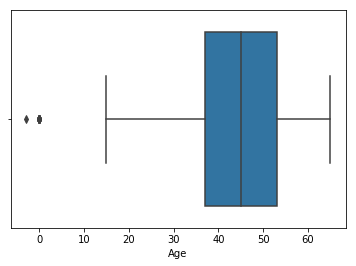

In [23]:
# Checking for Outliers

print(demographic.Age.describe())
sns.boxplot(x='Age', data=demographic)
plt.show()

In [24]:
# Few unrealistic values in Age column. We will handle them in WoE only.

demographic[demographic.Age <1].count()

Application ID                                 20
Age                                            20
Gender                                         19
Marital Status (at the time of application)    19
No of dependents                               19
Income                                         20
Education                                      20
Profession                                     19
Type of residence                              20
No of months in current residence              20
No of months in current company                20
Performance Tag                                20
dtype: int64

######  Understanding data of column Income

count    69867.000000
mean        27.409006
std         15.475890
min         -0.500000
25%         14.000000
50%         27.000000
75%         40.000000
max         60.000000
Name: Income, dtype: float64


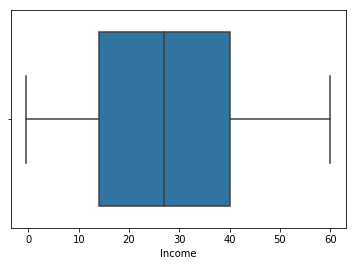

In [25]:
# Checking for outliers

print(demographic.Income.describe())
sns.boxplot(x='Income', data=demographic)
plt.show()

In [26]:
# Few incorrect entries in column Income. We will handle them in WoE
    
demographic[demographic.Income <0].count()

Application ID                                 81
Age                                            81
Gender                                         81
Marital Status (at the time of application)    81
No of dependents                               81
Income                                         81
Education                                      81
Profession                                     81
Type of residence                              81
No of months in current residence              81
No of months in current company                81
Performance Tag                                81
dtype: int64

######  Understanding data of column No of months in current residence

count    69867.000000
mean        34.608299
std         36.846256
min          6.000000
25%          6.000000
50%         10.000000
75%         61.000000
max        126.000000
Name: No of months in current residence, dtype: float64


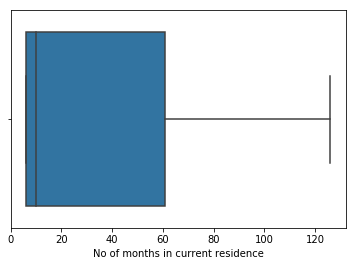

In [27]:
print(demographic['No of months in current residence'].describe())
sns.boxplot(x='No of months in current residence', data=demographic)
plt.show()

######  Understanding data of column No of months in current company

count    69867.000000
mean        34.198921
std         20.349768
min          3.000000
25%         17.000000
50%         34.000000
75%         51.000000
max        133.000000
Name: No of months in current company, dtype: float64


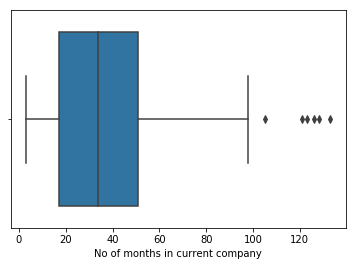

In [28]:
print(demographic['No of months in current company'].describe())
sns.boxplot(x='No of months in current company', data=demographic)
plt.show()

######  Understanding data of column Gender

In [29]:
demographic.Gender.describe()

count     69865
unique        2
top           M
freq      53359
Name: Gender, dtype: object

In [30]:
demographic['Gender'].value_counts()
default_count_Gender = demographic.groupby('Gender')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_Gender = demographic.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_gen = default_count_Gender.merge(No_of_applicants_Gender, on = 'Gender')
agg_gen['default_rate'] = 100*(agg_gen['default_count']/agg_gen['No_of_applicants']).round(4)
agg_gen

,Gender,default_count,No_of_applicants,default_rate
0,F,718,16506,4.35
1,M,2229,53359,4.18


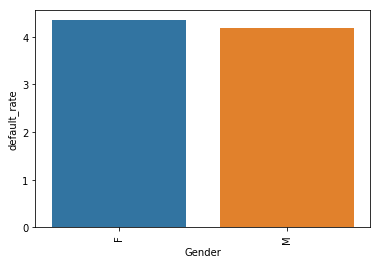

In [31]:
ax = sns.barplot(x='Gender', y='default_rate', data=agg_gen)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

######  Understanding data of column Profession

In [32]:
demographic['Profession '].describe()

count     69854
unique        3
top         SAL
freq      39673
Name: Profession , dtype: object

In [33]:
demographic['Profession '].value_counts()
default_count_profession = demographic.groupby('Profession ')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_profession = demographic.groupby('Profession ')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_prof = default_count_profession.merge(No_of_applicants_profession, on = 'Profession ')
agg_prof['default_rate'] = 100*(agg_prof['default_count']/agg_prof['No_of_applicants']).round(4)
agg_prof

,Profession,default_count,No_of_applicants,default_rate
0,SAL,1629,39673,4.11
1,SE,641,13925,4.60
2,SE_PROF,677,16256,4.16


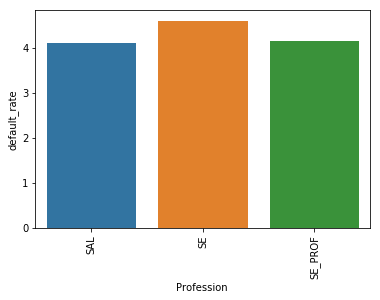

In [34]:
ax = sns.barplot(x='Profession ', y='default_rate', data=agg_prof)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

######  Understanding data of column Education

In [35]:
demographic['Education'].describe()

count            69749
unique               5
top       Professional
freq             24384
Name: Education, dtype: object

In [36]:
demographic['Education'].value_counts()
default_count_Education = demographic.groupby('Education')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_Education = demographic.groupby('Education')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_edu = default_count_Education.merge(No_of_applicants_Education, on = 'Education')
agg_edu['default_rate'] = 100*(agg_edu['default_count']/agg_edu['No_of_applicants']).round(4)
agg_edu

,Education,default_count,No_of_applicants,default_rate
0,Bachelor,742,17302,4.29
1,Masters,998,23481,4.25
2,Others,8,119,6.72
3,Phd,183,4463,4.10
4,Professional,1011,24384,4.15


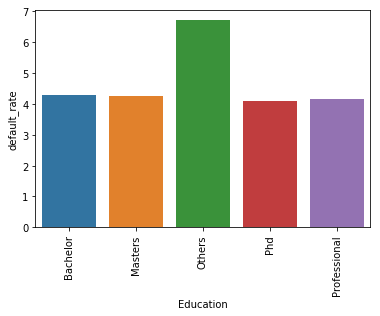

In [37]:
ax = sns.barplot(x='Education', y='default_rate', data=agg_edu)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

######  Understanding data of column Marital Status (at the time of application)

In [38]:
demographic['Marital Status (at the time of application)'].describe()

count       69861
unique          2
top       Married
freq        59544
Name: Marital Status (at the time of application), dtype: object

In [39]:
demographic['Marital Status (at the time of application)'].value_counts()
default_count_MS = demographic.groupby('Marital Status (at the time of application)')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_MS = demographic.groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_me = default_count_MS.merge(No_of_applicants_MS, on = 'Marital Status (at the time of application)')
agg_me['default_rate'] = 100*(agg_me['default_count']/agg_me['No_of_applicants']).round(4)
agg_me

,Marital Status (at the time of application),default_count,No_of_applicants,default_rate
0,Married,2502,59544,4.20
1,Single,445,10317,4.31


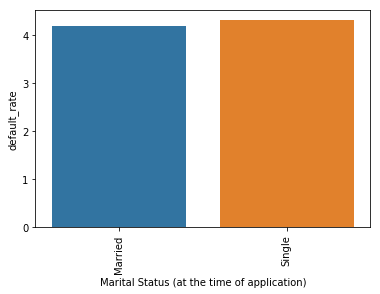

In [40]:
ax = sns.barplot(x='Marital Status (at the time of application)', y='default_rate', data=agg_me)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [41]:
demographic['Type of residence'].describe()

count      69859
unique         5
top       Rented
freq       52277
Name: Type of residence, dtype: object

In [42]:
demographic['Type of residence'].value_counts()
default_count_TR = demographic.groupby('Type of residence')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_TR = demographic.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_tr = default_count_TR.merge(No_of_applicants_TR, on = 'Type of residence')
agg_tr['default_rate'] = 100*(agg_tr['default_count']/agg_tr['No_of_applicants']).round(4)
agg_tr

,Type of residence,default_count,No_of_applicants,default_rate
0,Company provided,73,1603,4.55
1,Living with Parents,80,1778,4.50
2,Others,5,198,2.53
3,Owned,593,14003,4.23
4,Rented,2196,52277,4.20


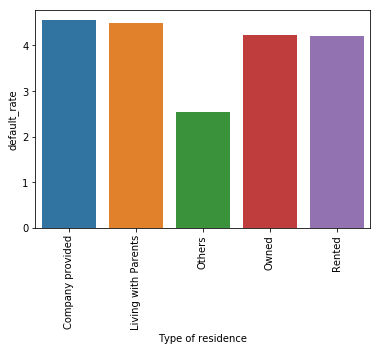

In [43]:
ax = sns.barplot(x='Type of residence', y='default_rate', data=agg_tr)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [44]:
demographic['Performance Tag'] = demographic['Performance Tag'].astype(bool)

In [45]:
demographic['Performance Tag'].describe()

count     69867
unique        2
top       False
freq      66920
Name: Performance Tag, dtype: object

In [46]:
demographic['Performance Tag'] = demographic['Performance Tag'].astype(int)

##### Analysing the credit bureau data

In [47]:
# Creating the master file first with merged dataset

master = pd.merge(demographic,credit_bureau,on = 'Application ID', how = 'inner')
master.shape

(69867, 30)

In [48]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 30 columns):
Application ID                                                     69867 non-null int64
Age                                                                69867 non-null int64
Gender                                                             69865 non-null object
Marital Status (at the time of application)                        69861 non-null object
No of dependents                                                   69864 non-null float64
Income                                                             69867 non-null float64
Education                                                          69749 non-null object
Profession                                                         69854 non-null object
Type of residence                                                  69859 non-null object
No of months in current residence                                  69867 non-null int64
No

In [49]:
# Removing the extra column which was created because of merging

master = master.drop(['Performance Tag_y'], axis=1)
master.shape

(69867, 29)

In [50]:
# Renaming the performance tag column of dataset

master = master.rename(columns={"Performance Tag_x": "Performance Tag"})
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 29 columns):
Application ID                                                     69867 non-null int64
Age                                                                69867 non-null int64
Gender                                                             69865 non-null object
Marital Status (at the time of application)                        69861 non-null object
No of dependents                                                   69864 non-null float64
Income                                                             69867 non-null float64
Education                                                          69749 non-null object
Profession                                                         69854 non-null object
Type of residence                                                  69859 non-null object
No of months in current residence                                  69867 non-null int64
No

In [51]:
# A few column in credit bureau data also have null values

master.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           118
Profession                                                           13
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

In [52]:
master['Performance Tag'] = master['Performance Tag'].astype(int) # changing type of target variable to int
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 29 columns):
Application ID                                                     69867 non-null int64
Age                                                                69867 non-null int64
Gender                                                             69865 non-null object
Marital Status (at the time of application)                        69861 non-null object
No of dependents                                                   69864 non-null float64
Income                                                             69867 non-null float64
Education                                                          69749 non-null object
Profession                                                         69854 non-null object
Type of residence                                                  69859 non-null object
No of months in current residence                                  69867 non-null int64
No

In [53]:
print(master['No of times 90 DPD or worse in last 6 months'].unique())
master['No of times 90 DPD or worse in last 6 months']= master['No of times 90 DPD or worse in last 6 months'].astype(str)
print(master['No of times 60 DPD or worse in last 6 months'].unique())
master['No of times 60 DPD or worse in last 6 months']= master['No of times 60 DPD or worse in last 6 months'].astype(str)
print(master['No of times 30 DPD or worse in last 6 months'].unique())
master['No of times 30 DPD or worse in last 6 months']= master['No of times 30 DPD or worse in last 6 months'].astype(str)
print(master['No of times 90 DPD or worse in last 12 months'].unique())
master['No of times 90 DPD or worse in last 12 months']= master['No of times 90 DPD or worse in last 12 months'].astype(str)
print(master['No of times 60 DPD or worse in last 12 months'].unique())
master['No of times 60 DPD or worse in last 12 months']= master['No of times 60 DPD or worse in last 12 months'].astype(str)
print(master['No of times 30 DPD or worse in last 12 months'].unique())
master['No of times 30 DPD or worse in last 12 months']= master['No of times 30 DPD or worse in last 12 months'].astype(str)

[0 1 2 3]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7 8 9]


###### Understanding data of column "Avgas CC Utilization in last 12 months"

count    68844.000000
mean        29.263581
std         29.514047
min          0.000000
25%          8.000000
50%         15.000000
75%         45.000000
max        113.000000
Name: Avgas CC Utilization in last 12 months, dtype: float64


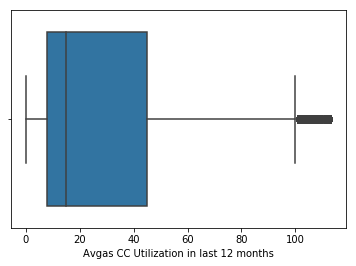

In [54]:
print(master['Avgas CC Utilization in last 12 months'].describe())
sns.boxplot(x='Avgas CC Utilization in last 12 months', data=master)
plt.show()

###### Understanding data of column "Outstanding Balance"

count    6.959500e+04
mean     1.253370e+06
std      1.286182e+06
min      0.000000e+00
25%      2.083955e+05
50%      7.742410e+05
75%      2.926238e+06
max      5.218801e+06
Name: Outstanding Balance, dtype: float64


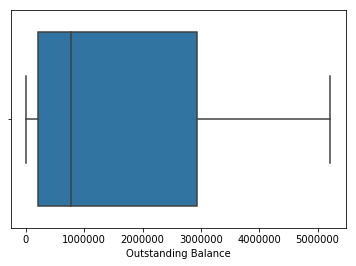

In [55]:

# Checking for Outliers
print(master['Outstanding Balance'].describe())
sns.boxplot(x='Outstanding Balance', data=master)
plt.show()

###### Understanding data of column "No of trades opened in last 6 months"

count    69866.000000
mean         2.285117
std          2.081900
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: No of trades opened in last 6 months, dtype: float64


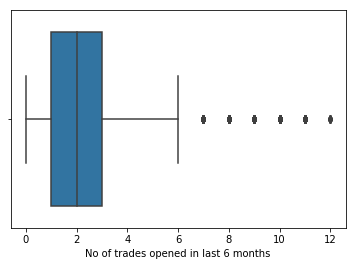

In [56]:
# Checking for Outliers
print(master['No of trades opened in last 6 months'].describe())
sns.boxplot(x='No of trades opened in last 6 months', data=master)
plt.show()

###### Understanding data of column "No of trades opened in last 12 months"

count    69867.000000
mean         5.784977
std          5.095437
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         28.000000
Name: No of trades opened in last 12 months, dtype: float64


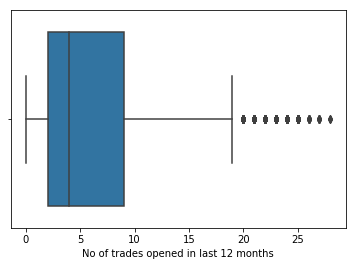

In [57]:
# Checking for Outliers
print(master['No of trades opened in last 12 months'].describe())
sns.boxplot(x='No of trades opened in last 12 months', data=master)
plt.show()

###### Understanding data of column "No of PL trades opened in last 12 months"

[ 0  1  2  6  7  8  5  4  3  9 11 10 12]
count    69867.000000
mean         2.363462
std          2.423655
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         12.000000
Name: No of PL trades opened in last 12 months, dtype: float64


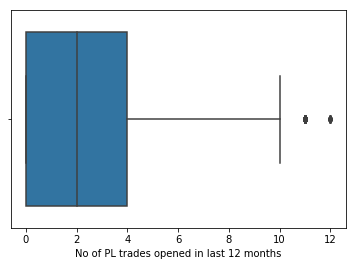

In [58]:
# Checking for Outliers
print(master['No of PL trades opened in last 12 months'].unique())
print(master['No of PL trades opened in last 12 months'].describe())
sns.boxplot(x='No of PL trades opened in last 12 months', data=master)
plt.show()

###### Understanding data of column "No of PL trades opened in last 6 months"

[0 1 2 5 4 3 6]
count    69867.000000
mean         1.189589
std          1.352690
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: No of PL trades opened in last 6 months, dtype: float64


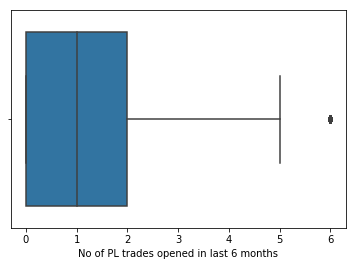

In [59]:
# Checking for Outliers
print(master['No of PL trades opened in last 6 months'].unique())
print(master['No of PL trades opened in last 6 months'].describe())
sns.boxplot(x='No of PL trades opened in last 6 months', data=master)
plt.show()

###### Understanding data of column "No of Inquiries in last 6 months (excluding home & auto loans)"

[ 0  1  2  3  6  7  5  4  9  8 10]
count    69867.000000
mean         1.757997
std          1.985052
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: float64


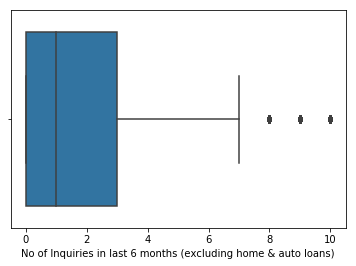

In [60]:
# Checking for Outliers
print(master['No of Inquiries in last 6 months (excluding home & auto loans)'].unique())
print(master['No of Inquiries in last 6 months (excluding home & auto loans)'].describe())
sns.boxplot(x='No of Inquiries in last 6 months (excluding home & auto loans)', data=master)
plt.show()

###### Understanding data of column "No of Inquiries in last 12 months (excluding home & auto loans)"

[ 0  1  2  3  4  5  6 11 16 12  9 10  8 13 14  7 17 15 19 18 20]
count    69867.000000
mean         3.525012
std          3.611761
min          0.000000
25%          0.000000
50%          3.000000
75%          5.000000
max         20.000000
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: float64


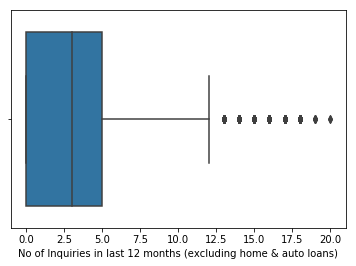

In [61]:
# Checking for Outliers
print(master['No of Inquiries in last 12 months (excluding home & auto loans)'].unique())
print(master['No of Inquiries in last 12 months (excluding home & auto loans)'].describe())
sns.boxplot(x='No of Inquiries in last 12 months (excluding home & auto loans)', data=master)
plt.show()

###### Understanding data of column "Total No of Trades"

[ 4  5  2  1  3  0  6  7  8  9 12 10 11 27 14 19 23 25 30 24 13 32 29 22
 26 16 20 31 18 21 15 36 17 28 33 34 35 38 37 43 39 40 44 42 41]
count    69867.000000
mean         8.174775
std          7.152940
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         44.000000
Name: Total No of Trades, dtype: float64


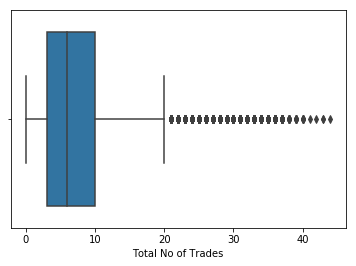

In [62]:
# Checking for Outliers
print(master['Total No of Trades'].unique())
print(master['Total No of Trades'].describe())
sns.boxplot(x='Total No of Trades', data=master)
plt.show()

###### There are outliers in some numeric variables. we will handle them during WoE. Lets understand data of some other variables

###### Understanding data of column "No of times 90 DPD or worse in last 6 months"

In [63]:
master['No of times 90 DPD or worse in last 6 months'].value_counts()
default_count_90dpd6 = master.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_90dpd6 = master.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_90dpd6 = default_count_90dpd6.merge(No_of_applicants_90dpd6, on = 'No of times 90 DPD or worse in last 6 months')
agg_90dpd6['default_rate'] = 100*(agg_90dpd6['default_count']/agg_90dpd6['No_of_applicants']).round(4)
agg_90dpd6

,No of times 90 DPD or worse in last 6 months,default_count,No_of_applicants,default_rate
0,0,1794,54664,3.28
1,1,970,13219,7.34
2,2,160,1776,9.01
3,3,23,208,11.06


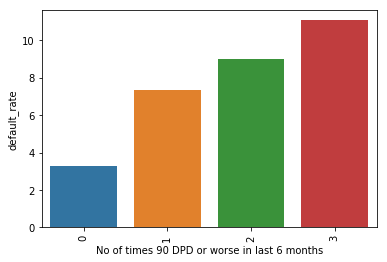

In [64]:
ax = sns.barplot(x='No of times 90 DPD or worse in last 6 months', y='default_rate', data=agg_90dpd6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### Understanding data of column "No of times 60 DPD or worse in last 6 months"

In [65]:
master['No of times 60 DPD or worse in last 6 months'].value_counts()
default_count_60dpd6 = master.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_60dpd6 = master.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_60dpd6 = default_count_60dpd6.merge(No_of_applicants_60dpd6, on = 'No of times 60 DPD or worse in last 6 months')
agg_60dpd6['default_rate'] = 100*(agg_60dpd6['default_count']/agg_60dpd6['No_of_applicants']).round(4)
agg_60dpd6

,No of times 60 DPD or worse in last 6 months,default_count,No_of_applicants,default_rate
0,0,1582,51870,3.05
1,1,783,11130,7.04
2,2,389,4917,7.91
3,3,148,1469,10.07
4,4,39,411,9.49
5,5,6,70,8.57


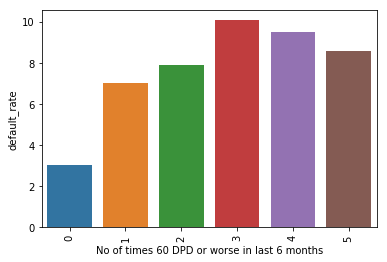

In [66]:
ax = sns.barplot(x='No of times 60 DPD or worse in last 6 months', y='default_rate', data=agg_60dpd6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### Understanding data of column "No of times 30 DPD or worse in last 6 months"

In [67]:
master['No of times 30 DPD or worse in last 6 months'].value_counts()
default_count_30dpd6 = master.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_30dpd6 = master.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_30dpd6 = default_count_30dpd6.merge(No_of_applicants_30dpd6, on = 'No of times 30 DPD or worse in last 6 months')
agg_30dpd6['default_rate'] = 100*(agg_30dpd6['default_count']/agg_30dpd6['No_of_applicants']).round(4)
agg_30dpd6

,No of times 30 DPD or worse in last 6 months,default_count,No_of_applicants,default_rate
0,0,1455,50098,2.90
1,1,622,9500,6.55
2,2,466,5897,7.90
3,3,245,2830,8.66
4,4,107,1045,10.24
5,5,43,386,11.14
6,6,8,96,8.33
7,7,1,15,6.67


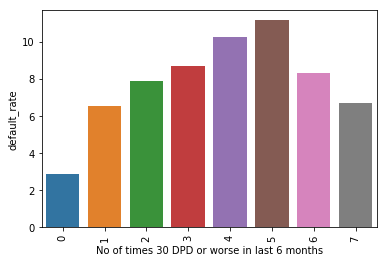

In [68]:
ax = sns.barplot(x='No of times 30 DPD or worse in last 6 months', y='default_rate', data=agg_30dpd6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### Understanding data of column "No of times 90 DPD or worse in last 12 months"

In [69]:
master['No of times 90 DPD or worse in last 12 months'].value_counts()
default_count_90dpd12 = master.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_90dpd12 = master.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_90dpd12 = default_count_90dpd12.merge(No_of_applicants_90dpd12, on = 'No of times 90 DPD or worse in last 12 months')
agg_90dpd12['default_rate'] = 100*(agg_90dpd12['default_count']/agg_90dpd12['No_of_applicants']).round(4)
agg_90dpd12

,No of times 90 DPD or worse in last 12 months,default_count,No_of_applicants,default_rate
0,0,1510,50492,2.99
1,1,796,11663,6.83
2,2,488,6160,7.92
3,3,120,1244,9.65
4,4,28,272,10.29
5,5,5,36,13.89


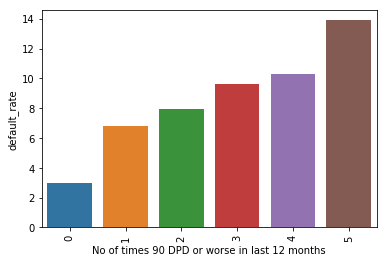

In [70]:
ax = sns.barplot(x='No of times 90 DPD or worse in last 12 months', y='default_rate', data=agg_90dpd12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### Understanding data of column "No of times 60 DPD or worse in last 12 months"

In [71]:
master['No of times 60 DPD or worse in last 12 months'].value_counts()
default_count_60dpd12 = master.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_60dpd12 = master.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_60dpd12 = default_count_60dpd12.merge(No_of_applicants_60dpd12, on = 'No of times 60 DPD or worse in last 12 months')
agg_60dpd12['default_rate'] = 100*(agg_60dpd12['default_count']/agg_60dpd12['No_of_applicants']).round(4)
agg_60dpd12

,No of times 60 DPD or worse in last 12 months,default_count,No_of_applicants,default_rate
0,0,1378,45868,3.00
1,1,663,12816,5.17
2,2,482,6414,7.51
3,3,274,3205,8.55
4,4,101,1048,9.64
5,5,36,398,9.05
6,6,13,111,11.71
7,7,0,7,0.00


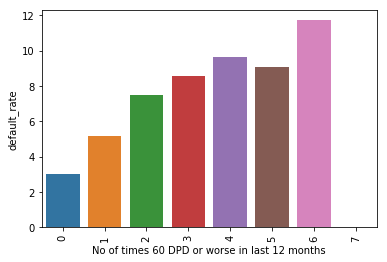

In [72]:
ax = sns.barplot(x='No of times 60 DPD or worse in last 12 months', y='default_rate', data=agg_60dpd12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### Understanding data of column "No of times 30 DPD or worse in last 12 months"

In [73]:
master['No of times 30 DPD or worse in last 12 months'].value_counts()
default_count_30dpd12 = master.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_30dpd12 = master.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_30dpd12 = default_count_30dpd12.merge(No_of_applicants_30dpd12, on = 'No of times 30 DPD or worse in last 12 months')
agg_30dpd12['default_rate'] = 100*(agg_30dpd12['default_count']/agg_30dpd12['No_of_applicants']).round(4)
agg_30dpd12

,No of times 30 DPD or worse in last 12 months,default_count,No_of_applicants,default_rate
0,0,1316,44857,2.93
1,1,518,11474,4.51
2,2,451,6116,7.37
3,3,349,4136,8.44
4,4,173,1924,8.99
5,5,89,853,10.43
6,6,38,376,10.11
7,7,11,107,10.28
8,8,2,23,8.70
9,9,0,1,0.00


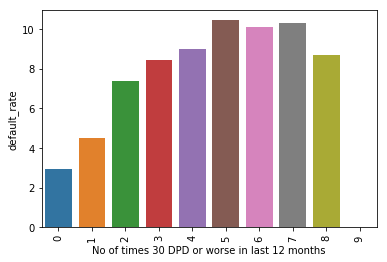

In [74]:
ax = sns.barplot(x='No of times 30 DPD or worse in last 12 months', y='default_rate', data=agg_30dpd12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### In almost all the deliquency variables we can that as the rate of deliquency increases. The chances that a customer will default also increases. Lets understand the few remaning variables of credit bureau dataset.

###### Understanding data of column "Presence of open home loan"

In [75]:
#print(master['Presence of open home loan'].unique())
#master['Presence of open home loan'] = master['Presence of open home loan'].astype(str)

master['Presence of open home loan'].value_counts()
default_count_homeloan = master.groupby('Presence of open home loan')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_homeloan = master.groupby('Presence of open home loan')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_homeloan = default_count_homeloan.merge(No_of_applicants_homeloan, on = 'Presence of open home loan')
agg_homeloan['default_rate'] = 100*(agg_homeloan['default_count']/agg_homeloan['No_of_applicants']).round(4)
agg_homeloan

,Presence of open home loan,default_count,No_of_applicants,default_rate
0,0.0,2332,51524,4.53
1,1.0,607,18071,3.36


Surprisingly people who do not have home loan are more likely to default then those who have a home loan

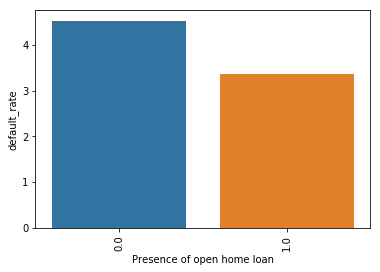

In [76]:
ax = sns.barplot(x='Presence of open home loan', y='default_rate', data=agg_homeloan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### Understanding data of column "Presence of open auto loan"

In [77]:
master['Presence of open auto loan'].value_counts()
default_count_autoloan = master.groupby('Presence of open auto loan')['Performance Tag'].sum().reset_index(name = 'default_count')
No_of_applicants_autoloan = master.groupby('Presence of open auto loan')['Performance Tag'].count().reset_index(name = 'No_of_applicants')
agg_autoloan = default_count_autoloan.merge(No_of_applicants_autoloan, on = 'Presence of open auto loan')
agg_autoloan['default_rate'] = 100*(agg_autoloan['default_count']/agg_autoloan['No_of_applicants']).round(4)
agg_autoloan

,Presence of open auto loan,default_count,No_of_applicants,default_rate
0,0,2728,63937,4.27
1,1,219,5930,3.69


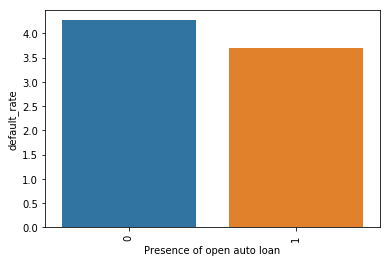

In [78]:
ax = sns.barplot(x='Presence of open auto loan', y='default_rate', data=agg_autoloan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

###### Although the percentage of missing values is very small but we still choose not to replace them.This is because as the target variable is heavily imbalanced, we can not affort to loose any defaulter data.

##### Understanding Reject Population data

In [79]:
# Understanding reject population data

demographic_reject.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            0
Marital Status (at the time of application)       0
No of dependents                                  0
Income                                            0
Education                                         1
Profession                                        1
Type of residence                                 0
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [80]:
# Understanding reject population data

credit_reject.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                               35
No of trades opened in last 6 months                                  0
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [81]:
# Checking the null data of column "Avgas CC Utilization in last 12 months"

credit_reject.loc[credit_reject['Avgas CC Utilization in last 12 months'].isnull()].head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
71145,302144302,0,1,2,1,2,4,NaN,5.0,11,3,4,3,5,0.0,711524.0,12,0,NaN
71146,856792433,1,1,1,2,2,1,NaN,1.0,4,1,2,3,5,0.0,490862.0,5,1,NaN
71147,270950740,1,1,2,1,2,3,NaN,3.0,6,2,2,2,4,1.0,3017798.0,8,0,NaN
71148,578700236,2,2,3,4,4,4,NaN,4.0,9,3,5,4,6,0.0,965731.0,11,0,NaN
71149,701035734,3,5,6,4,6,8,NaN,2.0,6,1,3,2,5,0.0,522425.0,7,0,NaN


In [82]:
# Imputing the null data

credit_reject.loc[credit_reject['Avgas CC Utilization in last 12 months'].isnull(),'Avgas CC Utilization in last 12 months'] = -1

In [83]:
# Checking the data again 

credit_reject.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                                0
No of trades opened in last 6 months                                  0
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [84]:
# Creating the master file first with merged dataset of rejected popultion

master_reject = pd.merge(demographic_reject,credit_reject,on = 'Application ID', how = 'inner')
master_reject.shape

(1425, 30)

In [85]:
# Removing the extra column which was created because of merging

master_reject = master_reject.drop(['Performance Tag_y'], axis=1)
master_reject.shape

(1425, 29)

In [86]:
# Renaming the performance tag column of dataset

master_reject = master_reject.rename(columns={"Performance Tag_x": "Performance Tag"})
master_reject.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 29 columns):
Application ID                                                     1425 non-null int64
Age                                                                1425 non-null int64
Gender                                                             1425 non-null object
Marital Status (at the time of application)                        1425 non-null object
No of dependents                                                   1425 non-null float64
Income                                                             1425 non-null float64
Education                                                          1424 non-null object
Profession                                                         1424 non-null object
Type of residence                                                  1425 non-null object
No of months in current residence                                  1425 non-null int64
No of months i

In [87]:
master_reject.loc[master_reject['Performance Tag'].isnull(),'Performance Tag'] = 1

#### WoE Calculations

In [88]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [89]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 29 columns):
Application ID                                                     69867 non-null int64
Age                                                                69867 non-null int64
Gender                                                             69865 non-null object
Marital Status (at the time of application)                        69861 non-null object
No of dependents                                                   69864 non-null float64
Income                                                             69867 non-null float64
Education                                                          69749 non-null object
Profession                                                         69854 non-null object
Type of residence                                                  69859 non-null object
No of months in current residence                                  69867 non-null int64
No

In [90]:
# Selecting all columns except the 2 two impute woe values for them
df = master.drop(['Application ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 28 columns):
Age                                                                69867 non-null int64
Gender                                                             69865 non-null object
Marital Status (at the time of application)                        69861 non-null object
No of dependents                                                   69864 non-null float64
Income                                                             69867 non-null float64
Education                                                          69749 non-null object
Profession                                                         69854 non-null object
Type of residence                                                  69859 non-null object
No of months in current residence                                  69867 non-null int64
No of months in current company                                    69867 non-null int64
Pe

In [91]:
# Performing WoE on merged dataset

iv, woe = iv_woe(data = df, target = 'Performance Tag', bins=10, show_woe = False)

Information value of Age is 0.00414
Information value of Gender is 0.000326
Information value of Marital Status (at the time of application) is 9.5e-05
Information value of No of dependents is 0.002654
Information value of Income is 0.042834
Information value of Education is 0.000784
Information value of Profession  is 0.00222
Information value of Type of residence is 0.00092
Information value of No of months in current residence is 0.070726
Information value of No of months in current company is 0.022828
Information value of No of times 90 DPD or worse in last 6 months is 0.16265
Information value of No of times 60 DPD or worse in last 6 months is 0.211263
Information value of No of times 30 DPD or worse in last 6 months is 0.244237
Information value of No of times 90 DPD or worse in last 12 months is 0.215644
Information value of No of times 60 DPD or worse in last 12 months is 0.188225
Information value of No of times 30 DPD or worse in last 12 months is 0.218599
Information value o

In [92]:
iv

,Variable,IV
0,Age,0.004140
0,Gender,0.000326
0,Marital Status (at the time of application),0.000095
0,No of dependents,0.002654
0,Income,0.042834
0,Education,0.000784
0,Profession,0.002220
0,Type of residence,0.000920
0,No of months in current residence,0.070726
0,No of months in current company,0.022828


##### Information Value    Variable Predictiveness
##### -----------------    ----------------
##### Less than 0.02      Not useful for prediction
##### 0.02 to 0.1         Weak predictive Power
##### 0.1 to 0.3          Medium predictive Power
##### 0.3 to 0.5          Strong predictive Power
##### more than 0.5       Suspicious Predictive Power

In [93]:
iv_df = iv[iv['IV'] > 0.02]
iv_df

,Variable,IV
0,Income,0.042834
0,No of months in current residence,0.070726
0,No of months in current company,0.022828
0,No of times 90 DPD or worse in last 6 months,0.162650
0,No of times 60 DPD or worse in last 6 months,0.211263
0,No of times 30 DPD or worse in last 6 months,0.244237
0,No of times 90 DPD or worse in last 12 months,0.215644
0,No of times 60 DPD or worse in last 12 months,0.188225
0,No of times 30 DPD or worse in last 12 months,0.218599
0,Avgas CC Utilization in last 12 months,0.321857


In [94]:
# Filtering only those rows which have atleast some preditive power

iv_variables = list(iv_df.Variable.unique())
iv_variables

['Income',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Outstanding Balance',
 'Total No of Trades']

In [95]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(-3.001, 31.0]",7274,302,0.102477,6972,0.104184,-0.016520,0.000028
1,Age,"(31.0, 36.0]",7866,342,0.116050,7524,0.112433,0.031668,0.000115
2,Age,"(36.0, 39.0]",7145,320,0.108585,6825,0.101987,0.062684,0.000414
3,Age,"(39.0, 42.0]",7002,309,0.104852,6693,0.100015,0.047234,0.000228
4,Age,"(42.0, 45.0]",6879,278,0.094333,6601,0.098640,-0.044645,0.000192
5,Age,"(45.0, 48.0]",6869,299,0.101459,6570,0.098177,0.032885,0.000108
6,Age,"(48.0, 51.0]",6791,267,0.090601,6524,0.097490,-0.073284,0.000505
7,Age,"(51.0, 54.0]",6786,248,0.084153,6538,0.097699,-0.149248,0.002022
8,Age,"(54.0, 58.0]",6407,290,0.098405,6117,0.091408,0.073764,0.000516
9,Age,"(58.0, 65.0]",6848,292,0.099084,6556,0.097968,0.011328,0.000013


In [96]:
woe = woe[woe.Variable.isin(iv_variables)]
woe.shape

(140, 9)

In [97]:
woe.Variable.unique()

array(['Income', 'No of months in current residence',
       'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Outstanding Balance', 'Total No of Trades'], dtype=object)

In [98]:
woe_df = master[iv_variables]
woe_df['Performance Tag'] = master['Performance Tag']
woe_df.shape

(69867, 19)

In [99]:
# Doing the same step for reject population

woe_df_reject = master_reject[iv_variables]
woe_df_reject['Performance Tag'] = master_reject['Performance Tag']
woe_df_reject.shape

(1425, 19)

In [100]:
woe_df.isnull().sum()

Income                                                                0
No of months in current residence                                     0
No of months in current company                                       0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1023
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                        

In [101]:
# Filling Null values in dataset with -1

woe_df['Avgas CC Utilization in last 12 months'].fillna(-1, inplace = True)
woe_df.isnull().sum()

Income                                                               0
No of months in current residence                                    0
No of months in current company                                      0
No of times 90 DPD or worse in last 6 months                         0
No of times 60 DPD or worse in last 6 months                         0
No of times 30 DPD or worse in last 6 months                         0
No of times 90 DPD or worse in last 12 months                        0
No of times 60 DPD or worse in last 12 months                        0
No of times 30 DPD or worse in last 12 months                        0
Avgas CC Utilization in last 12 months                               0
No of trades opened in last 6 months                                 1
No of trades opened in last 12 months                                0
No of PL trades opened in last 6 months                              0
No of PL trades opened in last 12 months                             0
No of 

In [102]:
# Filling Null values in dataset with -1

woe_df['No of trades opened in last 6 months'].fillna(-1, inplace = True)
woe_df.isnull().sum()

Income                                                               0
No of months in current residence                                    0
No of months in current company                                      0
No of times 90 DPD or worse in last 6 months                         0
No of times 60 DPD or worse in last 6 months                         0
No of times 30 DPD or worse in last 6 months                         0
No of times 90 DPD or worse in last 12 months                        0
No of times 60 DPD or worse in last 12 months                        0
No of times 30 DPD or worse in last 12 months                        0
Avgas CC Utilization in last 12 months                               0
No of trades opened in last 6 months                                 0
No of trades opened in last 12 months                                0
No of PL trades opened in last 6 months                              0
No of PL trades opened in last 12 months                             0
No of 

In [103]:
# Filling Null values in dataset with -1

woe_df['Outstanding Balance'].fillna(-1,inplace = True)
woe_df.isnull().sum()

Income                                                             0
No of months in current residence                                  0
No of months in current company                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 6 months                               0
No of trades opened in last 12 months                              0
No of PL trades opened in last 6 months                            0
No of PL trades opened in last 12 months                           0
No of Inquiries in last 6 months (

In [104]:
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 19 columns):
Income                                                             69867 non-null float64
No of months in current residence                                  69867 non-null int64
No of months in current company                                    69867 non-null int64
No of times 90 DPD or worse in last 6 months                       69867 non-null object
No of times 60 DPD or worse in last 6 months                       69867 non-null object
No of times 30 DPD or worse in last 6 months                       69867 non-null object
No of times 90 DPD or worse in last 12 months                      69867 non-null object
No of times 60 DPD or worse in last 12 months                      69867 non-null object
No of times 30 DPD or worse in last 12 months                      69867 non-null object
Avgas CC Utilization in last 12 months                             69867 non-null float64
N

###### Checking WoE again. Only of the selected columns

In [105]:
iv, woe = iv_woe(data = woe_df, target = 'Performance Tag', bins=10, show_woe = True)

Information value of Income is 0.042834
  Variable         Cutoff     N  Events  % of Events  Non-Events  \
0   Income  (-0.501, 6.0]  7646     451     0.153037        7195   
1   Income    (6.0, 11.0]  6514     314     0.106549        6200   
2   Income   (11.0, 17.0]  7979     363     0.123176        7616   
3   Income   (17.0, 22.0]  6791     320     0.108585        6471   
4   Income   (22.0, 27.0]  6794     283     0.096030        6511   
5   Income   (27.0, 32.0]  6836     298     0.101120        6538   
6   Income   (32.0, 37.0]  6851     251     0.085171        6600   
7   Income   (37.0, 42.0]  6598     214     0.072616        6384   
8   Income   (42.0, 49.0]  7393     265     0.089922        7128   
9   Income   (49.0, 60.0]  6465     188     0.063794        6277   

   % of Non-Events       WoE        IV  
0         0.107516  0.353036  0.016070  
1         0.092648  0.139799  0.001943  
2         0.113808  0.079106  0.000741  
3         0.096698  0.115945  0.001378  
4     

                                 Variable         Cutoff     N  Events  \
0  Avgas CC Utilization in last 12 months  (-1.001, 5.0]  9044     193   
1  Avgas CC Utilization in last 12 months     (5.0, 7.0]  6358     126   
2  Avgas CC Utilization in last 12 months     (7.0, 9.0]  6967     145   
3  Avgas CC Utilization in last 12 months    (9.0, 11.0]  6115     142   
4  Avgas CC Utilization in last 12 months   (11.0, 14.0]  6595     177   
5  Avgas CC Utilization in last 12 months   (14.0, 21.0]  6854     268   
6  Avgas CC Utilization in last 12 months   (21.0, 37.0]  7122     471   
7  Avgas CC Utilization in last 12 months   (37.0, 52.0]  7164     517   
8  Avgas CC Utilization in last 12 months   (52.0, 72.0]  6847     504   
9  Avgas CC Utilization in last 12 months  (72.0, 113.0]  6801     404   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.065490        8851         0.132262 -0.702885  0.046933  
1     0.042755        6232         0.093126 -0.778461

Information value of Total No of Trades is 0.232287
             Variable         Cutoff      N  Events  % of Events  Non-Events  \
0  Total No of Trades  (-0.001, 2.0]  10680     192     0.065151       10488   
1  Total No of Trades     (2.0, 3.0]   8615     184     0.062436        8431   
2  Total No of Trades     (3.0, 4.0]   7490     205     0.069562        7285   
3  Total No of Trades     (4.0, 5.0]   5714     230     0.078045        5484   
4  Total No of Trades     (5.0, 6.0]   4966     237     0.080421        4729   
5  Total No of Trades     (6.0, 7.0]   4828     270     0.091619        4558   
6  Total No of Trades     (7.0, 9.0]   8439     578     0.196132        7861   
7  Total No of Trades    (9.0, 11.0]   5730     384     0.130302        5346   
8  Total No of Trades   (11.0, 20.0]   6587     397     0.134713        6190   
9  Total No of Trades   (20.0, 44.0]   6818     270     0.091619        6548   

   % of Non-Events       WoE        IV  
0         0.156724 -0.8777

In [106]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Income,"(-0.501, 6.0]",7646,451,0.153037,7195,0.107516,0.353036,1.607039e-02
1,Income,"(6.0, 11.0]",6514,314,0.106549,6200,0.092648,0.139799,1.943353e-03
2,Income,"(11.0, 17.0]",7979,363,0.123176,7616,0.113808,0.079106,7.411149e-04
3,Income,"(17.0, 22.0]",6791,320,0.108585,6471,0.096698,0.115945,1.378293e-03
4,Income,"(22.0, 27.0]",6794,283,0.096030,6511,0.097295,-0.013091,1.656591e-05
5,Income,"(27.0, 32.0]",6836,298,0.101120,6538,0.097699,0.034417,1.177421e-04
6,Income,"(32.0, 37.0]",6851,251,0.085171,6600,0.098625,-0.146662,1.973168e-03
7,Income,"(37.0, 42.0]",6598,214,0.072616,6384,0.095397,-0.272864,6.216187e-03
8,Income,"(42.0, 49.0]",7393,265,0.089922,7128,0.106515,-0.169346,2.810006e-03
9,Income,"(49.0, 60.0]",6465,188,0.063794,6277,0.093799,-0.385495,1.156674e-02


In [107]:
iv

,Variable,IV
0,Income,0.042834
0,No of months in current residence,0.070726
0,No of months in current company,0.022828
0,No of times 90 DPD or worse in last 6 months,0.162650
0,No of times 60 DPD or worse in last 6 months,0.211263
0,No of times 30 DPD or worse in last 6 months,0.244237
0,No of times 90 DPD or worse in last 12 months,0.215644
0,No of times 60 DPD or worse in last 12 months,0.188225
0,No of times 30 DPD or worse in last 12 months,0.218599
0,Avgas CC Utilization in last 12 months,0.299205


###### WoE is calculated. Now, we have to populate the WoE value of selected columns in our dataset accordingly. Let's do it for each column one by one.

#### WoE of "Income"

In [108]:
# Extracting income data from woe_table

woe_income = woe[woe['Variable'] == 'Income']
woe_income

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Income,"(-0.501, 6.0]",7646,451,0.153037,7195,0.107516,0.353036,0.016070
1,Income,"(6.0, 11.0]",6514,314,0.106549,6200,0.092648,0.139799,0.001943
2,Income,"(11.0, 17.0]",7979,363,0.123176,7616,0.113808,0.079106,0.000741
3,Income,"(17.0, 22.0]",6791,320,0.108585,6471,0.096698,0.115945,0.001378
4,Income,"(22.0, 27.0]",6794,283,0.096030,6511,0.097295,-0.013091,0.000017
5,Income,"(27.0, 32.0]",6836,298,0.101120,6538,0.097699,0.034417,0.000118
6,Income,"(32.0, 37.0]",6851,251,0.085171,6600,0.098625,-0.146662,0.001973
7,Income,"(37.0, 42.0]",6598,214,0.072616,6384,0.095397,-0.272864,0.006216
8,Income,"(42.0, 49.0]",7393,265,0.089922,7128,0.106515,-0.169346,0.002810
9,Income,"(49.0, 60.0]",6465,188,0.063794,6277,0.093799,-0.385495,0.011567


In [109]:
# Renaming column to age bins, for future merging

woe_income = woe_income.rename(columns={'Cutoff': 'income_bins'})
woe_income

,Variable,income_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Income,"(-0.501, 6.0]",7646,451,0.153037,7195,0.107516,0.353036,0.016070
1,Income,"(6.0, 11.0]",6514,314,0.106549,6200,0.092648,0.139799,0.001943
2,Income,"(11.0, 17.0]",7979,363,0.123176,7616,0.113808,0.079106,0.000741
3,Income,"(17.0, 22.0]",6791,320,0.108585,6471,0.096698,0.115945,0.001378
4,Income,"(22.0, 27.0]",6794,283,0.096030,6511,0.097295,-0.013091,0.000017
5,Income,"(27.0, 32.0]",6836,298,0.101120,6538,0.097699,0.034417,0.000118
6,Income,"(32.0, 37.0]",6851,251,0.085171,6600,0.098625,-0.146662,0.001973
7,Income,"(37.0, 42.0]",6598,214,0.072616,6384,0.095397,-0.272864,0.006216
8,Income,"(42.0, 49.0]",7393,265,0.089922,7128,0.106515,-0.169346,0.002810
9,Income,"(49.0, 60.0]",6465,188,0.063794,6277,0.093799,-0.385495,0.011567


In [110]:
# Creating bins that are same as the ones created in woe_income table

bins = np.arange(2.0,55,5)
bins[0] = -0.5
bins[1] = 6.0
bins[2] = 11.0
bins[9] = 49.0
bins[10] = 60.0
bins

array([-0.5,  6. , 11. , 17. , 22. , 27. , 32. , 37. , 42. , 49. , 60. ])

In [111]:
# Creating similar bins in demographic data

woe_df['income_bins'] = pd.cut(woe_df['Income'], bins, include_lowest=True) 
woe_df['income_bins'].shape

(69867,)

In [112]:
# Creating similar bins in reject data

woe_df_reject['income_bins'] = pd.cut(woe_df_reject['Income'], bins, include_lowest=True) 
woe_df_reject['income_bins'].shape

(1425,)

In [113]:
# Making the data type of the common column same, for merging

woe_df['income_bins'] =  woe_df['income_bins'].astype(str)
woe_income['income_bins'] =  woe_income['income_bins'].astype(str)

woe_df_reject['income_bins'] =  woe_df_reject['income_bins'].astype(str)


In [114]:
woe_df.income_bins.describe()

count            69867
unique              10
top       (11.0, 17.0]
freq              7979
Name: income_bins, dtype: object

In [115]:
woe_df = pd.merge(woe_df,woe_income[['income_bins','WoE']],how = 'inner', on = 'income_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'income_WoE'})
woe_df.shape

(69867, 21)

In [116]:
woe_df = woe_df.drop(columns =['Income','income_bins'])
woe_df.shape

(69867, 19)

In [117]:
woe_df_reject = pd.merge(woe_df_reject,woe_income[['income_bins','WoE']],how = 'inner', on = 'income_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'income_WoE'})
woe_df_reject.shape

(1425, 21)

In [118]:
woe_df_reject = woe_df_reject.drop(columns =['Income','income_bins'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of months in current residence"

In [119]:
# Extracting nmcr(No of months in current residence) data from woe_table

woe_nmcr = woe[woe['Variable'] == 'No of months in current residence'] 
woe_nmcr

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of months in current residence,"(5.999, 10.0]",35080,1160,0.393621,33920,0.506874,-0.252875,0.028639
1,No of months in current residence,"(10.0, 29.0]",6922,457,0.155073,6465,0.096608,0.473235,0.027668
2,No of months in current residence,"(29.0, 50.0]",7162,403,0.136749,6759,0.101001,0.303017,0.010832
3,No of months in current residence,"(50.0, 73.0]",6937,329,0.111639,6608,0.098745,0.122732,0.001583
4,No of months in current residence,"(73.0, 98.0]",6924,328,0.111300,6596,0.098565,0.121505,0.001547
5,No of months in current residence,"(98.0, 126.0]",6842,270,0.091619,6572,0.098207,-0.069441,0.000457


In [120]:
# Renaming column to nmcr_bins, for future merging

woe_nmcr = woe_nmcr.rename(columns={'Cutoff': 'nmcr_bins'}) 
woe_nmcr

,Variable,nmcr_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of months in current residence,"(5.999, 10.0]",35080,1160,0.393621,33920,0.506874,-0.252875,0.028639
1,No of months in current residence,"(10.0, 29.0]",6922,457,0.155073,6465,0.096608,0.473235,0.027668
2,No of months in current residence,"(29.0, 50.0]",7162,403,0.136749,6759,0.101001,0.303017,0.010832
3,No of months in current residence,"(50.0, 73.0]",6937,329,0.111639,6608,0.098745,0.122732,0.001583
4,No of months in current residence,"(73.0, 98.0]",6924,328,0.111300,6596,0.098565,0.121505,0.001547
5,No of months in current residence,"(98.0, 126.0]",6842,270,0.091619,6572,0.098207,-0.069441,0.000457


In [121]:
# Creating bins that are same as the ones created in woe_nmcr table

bins = np.arange(1,8,1)
bins[0] = 6
bins[1] = 10.0
bins[2] = 29.0
bins[3] = 50.0
bins[4] = 73.0
bins[5] = 98.0
bins[6] = 126.0
bins

array([  6,  10,  29,  50,  73,  98, 126])

In [122]:
# Creating similar bins in data

woe_df['nmcr_bins'] = pd.cut(woe_df['No of months in current residence'], bins, include_lowest=True) 
woe_df['nmcr_bins'].unique()

[(98.0, 126.0], (73.0, 98.0], (50.0, 73.0], (29.0, 50.0], (5.999, 10.0], (10.0, 29.0]]
Categories (6, interval[float64]): [(5.999, 10.0] < (10.0, 29.0] < (29.0, 50.0] < (50.0, 73.0] < (73.0, 98.0] < (98.0, 126.0]]

In [123]:
# Creating similar bins in reject data as well

woe_df_reject['nmcr_bins'] = pd.cut(woe_df_reject['No of months in current residence'], bins, include_lowest=True) 
woe_df_reject['nmcr_bins'].unique()

[(10.0, 29.0], (73.0, 98.0], (5.999, 10.0], (50.0, 73.0], (98.0, 126.0], (29.0, 50.0]]
Categories (6, interval[float64]): [(5.999, 10.0] < (10.0, 29.0] < (29.0, 50.0] < (50.0, 73.0] < (73.0, 98.0] < (98.0, 126.0]]

In [124]:
# Making the data type of the common column same, for merging

woe_df['nmcr_bins'] =  woe_df['nmcr_bins'].astype(str)
woe_nmcr['nmcr_bins'] =  woe_nmcr['nmcr_bins'].astype(str)

woe_df_reject['nmcr_bins'] =  woe_df_reject['nmcr_bins'].astype(str)

In [125]:
woe_df = pd.merge(woe_df,woe_nmcr[['nmcr_bins','WoE']],how = 'inner', on = 'nmcr_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'nmcr_WoE'})
woe_df.shape

(69867, 21)

In [126]:
woe_df = woe_df.drop(columns =['No of months in current residence','nmcr_bins'])
woe_df.shape

(69867, 19)

In [127]:
woe_df_reject = pd.merge(woe_df_reject,woe_nmcr[['nmcr_bins','WoE']],how = 'inner', on = 'nmcr_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'nmcr_WoE'})
woe_df_reject.shape

(1425, 21)

In [128]:
woe_df_reject = woe_df_reject.drop(columns =['No of months in current residence','nmcr_bins'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of months in current company"

In [129]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_nmcc = woe[woe['Variable'] == 'No of months in current company'] 
woe_nmcc

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of months in current company,"(2.999, 6.0]",7655,356,0.120801,7299,0.109071,0.102148,1.198228e-03
1,No of months in current company,"(6.0, 13.0]",6848,344,0.116729,6504,0.097191,0.183179,3.578992e-03
2,No of months in current company,"(13.0, 20.0]",6878,350,0.118765,6528,0.097549,0.196787,4.174950e-03
3,No of months in current company,"(20.0, 27.0]",7035,297,0.100780,6738,0.100687,0.000924,8.598320e-08
4,No of months in current company,"(27.0, 34.0]",7038,278,0.094333,6760,0.101016,-0.068447,4.574249e-04
5,No of months in current company,"(34.0, 41.0]",7215,310,0.105192,6905,0.103183,0.019281,3.873278e-05
6,No of months in current company,"(41.0, 48.0]",7224,264,0.089583,6960,0.104005,-0.149275,2.152874e-03
7,No of months in current company,"(48.0, 54.0]",6181,204,0.069223,5977,0.089316,-0.254844,5.120492e-03
8,No of months in current company,"(54.0, 62.0]",7654,259,0.087886,7395,0.110505,-0.229021,5.180251e-03
9,No of months in current company,"(62.0, 133.0]",6139,285,0.096709,5854,0.087478,0.100319,9.260368e-04


In [130]:
# Renaming column to nmcc_bins, for future merging

woe_nmcc = woe_nmcc.rename(columns={'Cutoff': 'nmcc_bins'}) 
woe_nmcc

,Variable,nmcc_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of months in current company,"(2.999, 6.0]",7655,356,0.120801,7299,0.109071,0.102148,1.198228e-03
1,No of months in current company,"(6.0, 13.0]",6848,344,0.116729,6504,0.097191,0.183179,3.578992e-03
2,No of months in current company,"(13.0, 20.0]",6878,350,0.118765,6528,0.097549,0.196787,4.174950e-03
3,No of months in current company,"(20.0, 27.0]",7035,297,0.100780,6738,0.100687,0.000924,8.598320e-08
4,No of months in current company,"(27.0, 34.0]",7038,278,0.094333,6760,0.101016,-0.068447,4.574249e-04
5,No of months in current company,"(34.0, 41.0]",7215,310,0.105192,6905,0.103183,0.019281,3.873278e-05
6,No of months in current company,"(41.0, 48.0]",7224,264,0.089583,6960,0.104005,-0.149275,2.152874e-03
7,No of months in current company,"(48.0, 54.0]",6181,204,0.069223,5977,0.089316,-0.254844,5.120492e-03
8,No of months in current company,"(54.0, 62.0]",7654,259,0.087886,7395,0.110505,-0.229021,5.180251e-03
9,No of months in current company,"(62.0, 133.0]",6139,285,0.096709,5854,0.087478,0.100319,9.260368e-04


In [131]:
# Creating bins that are same as the ones created in woe_nmcc table

bins = np.arange(-1,74,7)
bins[0] = 3
bins[8] = 54.0
bins[10] = 133.0
bins

array([  3,   6,  13,  20,  27,  34,  41,  48,  54,  62, 133])

In [132]:
# Creating similar bins in data

woe_df['nmcc_bins'] = pd.cut(woe_df['No of months in current company'], bins, include_lowest=True) 
woe_df['nmcc_bins'].unique()

[(54.0, 62.0], (48.0, 54.0], (41.0, 48.0], (20.0, 27.0], (27.0, 34.0], (34.0, 41.0], (13.0, 20.0], (2.999, 6.0], (6.0, 13.0], (62.0, 133.0]]
Categories (10, interval[float64]): [(2.999, 6.0] < (6.0, 13.0] < (13.0, 20.0] < (20.0, 27.0] ... (41.0, 48.0] < (48.0, 54.0] < (54.0, 62.0] < (62.0, 133.0]]

In [133]:
# Creating similar bins in reject data

woe_df_reject['nmcc_bins'] = pd.cut(woe_df_reject['No of months in current company'], bins, include_lowest=True) 
woe_df_reject['nmcc_bins'].unique()

[(13.0, 20.0], (6.0, 13.0], (2.999, 6.0], (62.0, 133.0], (34.0, 41.0], (48.0, 54.0], (20.0, 27.0], (27.0, 34.0], (54.0, 62.0], (41.0, 48.0]]
Categories (10, interval[float64]): [(2.999, 6.0] < (6.0, 13.0] < (13.0, 20.0] < (20.0, 27.0] ... (41.0, 48.0] < (48.0, 54.0] < (54.0, 62.0] < (62.0, 133.0]]

In [134]:
# Making the data type of the common column same, for merging

woe_df['nmcc_bins'] =  woe_df['nmcc_bins'].astype(str)
woe_nmcc['nmcc_bins'] =  woe_nmcc['nmcc_bins'].astype(str)
woe_df_reject['nmcc_bins'] =  woe_df_reject['nmcc_bins'].astype(str)

In [135]:
woe_df = pd.merge(woe_df,woe_nmcc[['nmcc_bins','WoE']],how = 'inner', on = 'nmcc_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'nmcc_WoE'}) 
woe_df.shape

(69867, 21)

In [136]:
woe_df = woe_df.drop(columns =['No of months in current company','nmcc_bins'])
woe_df.shape

(69867, 19)

In [137]:
woe_df_reject = pd.merge(woe_df_reject,woe_nmcc[['nmcc_bins','WoE']],how = 'inner', on = 'nmcc_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'nmcc_WoE'}) 
woe_df_reject.shape

(1425, 21)

In [138]:
woe_df_reject = woe_df_reject.drop(columns =['No of months in current company','nmcc_bins'])
woe_df_reject.shape

(1425, 19)

#### WoE of "No of times 90 DPD or worse in last 6 months"

In [139]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_90DPD6 = woe[woe['Variable'] == 'No of times 90 DPD or worse in last 6 months'] 
woe_90DPD6

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 90 DPD or worse in last 6 months,0,54664,1794,0.608755,52870,0.790048,-0.260678,0.047259
1,No of times 90 DPD or worse in last 6 months,1,13219,970,0.329148,12249,0.183039,0.586807,0.085738
2,No of times 90 DPD or worse in last 6 months,2,1776,160,0.054293,1616,0.024148,0.810175,0.024422
3,No of times 90 DPD or worse in last 6 months,3,208,23,0.007805,185,0.002764,1.037849,0.005231


In [140]:
# Renaming column to nmcc_bins, for future merging

woe_90DPD6 = woe_90DPD6.rename(columns={'Cutoff': 'No of times 90 DPD or worse in last 6 months'}) 
woe_90DPD6

,Variable,No of times 90 DPD or worse in last 6 months,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 90 DPD or worse in last 6 months,0,54664,1794,0.608755,52870,0.790048,-0.260678,0.047259
1,No of times 90 DPD or worse in last 6 months,1,13219,970,0.329148,12249,0.183039,0.586807,0.085738
2,No of times 90 DPD or worse in last 6 months,2,1776,160,0.054293,1616,0.024148,0.810175,0.024422
3,No of times 90 DPD or worse in last 6 months,3,208,23,0.007805,185,0.002764,1.037849,0.005231


In [141]:
woe_df = pd.merge(woe_df,woe_90DPD6[['No of times 90 DPD or worse in last 6 months','WoE']],how = 'inner', on = 'No of times 90 DPD or worse in last 6 months')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': '90DPD6_WoE'}) 
woe_df.shape

(69867, 20)

In [142]:
woe_df = woe_df.drop(columns =['No of times 90 DPD or worse in last 6 months'])
woe_df.shape

(69867, 19)

In [143]:
woe_df_reject['No of times 90 DPD or worse in last 6 months'] =  woe_df_reject['No of times 90 DPD or worse in last 6 months'].astype(str)
woe_df_reject = pd.merge(woe_df_reject,woe_90DPD6[['No of times 90 DPD or worse in last 6 months','WoE']],how = 'inner', on = 'No of times 90 DPD or worse in last 6 months')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': '90DPD6_WoE'}) 
woe_df_reject.shape

(1425, 20)

In [144]:
woe_df_reject = woe_df_reject.drop(columns =['No of times 90 DPD or worse in last 6 months'])
woe_df_reject.shape

(1425, 19)

#### WoE of "No of times 60 DPD or worse in last 6 months"

In [145]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_60DPD6 = woe[woe['Variable'] == 'No of times 60 DPD or worse in last 6 months'] 
woe_60DPD6

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 60 DPD or worse in last 6 months,0,51870,1582,0.536817,50288,0.751464,-0.336366,0.072200
1,No of times 60 DPD or worse in last 6 months,1,11130,783,0.265694,10347,0.154617,0.541391,0.060136
2,No of times 60 DPD or worse in last 6 months,2,4917,389,0.131999,4528,0.067663,0.668254,0.042993
3,No of times 60 DPD or worse in last 6 months,3,1469,148,0.050221,1321,0.019740,0.933778,0.028462
4,No of times 60 DPD or worse in last 6 months,4,411,39,0.013234,372,0.005559,0.867378,0.006657
5,No of times 60 DPD or worse in last 6 months,5,70,6,0.002036,64,0.000956,0.755587,0.000816


In [146]:
# Renaming column to nmcc_bins, for future merging

woe_60DPD6 = woe_60DPD6.rename(columns={'Cutoff': 'No of times 60 DPD or worse in last 6 months'}) 
woe_60DPD6

,Variable,No of times 60 DPD or worse in last 6 months,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 60 DPD or worse in last 6 months,0,51870,1582,0.536817,50288,0.751464,-0.336366,0.072200
1,No of times 60 DPD or worse in last 6 months,1,11130,783,0.265694,10347,0.154617,0.541391,0.060136
2,No of times 60 DPD or worse in last 6 months,2,4917,389,0.131999,4528,0.067663,0.668254,0.042993
3,No of times 60 DPD or worse in last 6 months,3,1469,148,0.050221,1321,0.019740,0.933778,0.028462
4,No of times 60 DPD or worse in last 6 months,4,411,39,0.013234,372,0.005559,0.867378,0.006657
5,No of times 60 DPD or worse in last 6 months,5,70,6,0.002036,64,0.000956,0.755587,0.000816


In [147]:
woe_df = pd.merge(woe_df,woe_60DPD6[['No of times 60 DPD or worse in last 6 months','WoE']],how = 'inner', on = 'No of times 60 DPD or worse in last 6 months')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': '60DPD6_WoE'}) 
woe_df.shape

(69867, 20)

In [148]:
woe_df = woe_df.drop(columns =['No of times 60 DPD or worse in last 6 months'])
woe_df.shape

(69867, 19)

In [149]:
woe_df_reject['No of times 60 DPD or worse in last 6 months'] =  woe_df_reject['No of times 60 DPD or worse in last 6 months'].astype(str)
woe_df_reject = pd.merge(woe_df_reject,woe_60DPD6[['No of times 60 DPD or worse in last 6 months','WoE']],how = 'inner', on = 'No of times 60 DPD or worse in last 6 months')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': '60DPD6_WoE'}) 
woe_df_reject.shape

(1425, 20)

In [150]:
woe_df_reject = woe_df_reject.drop(columns =['No of times 60 DPD or worse in last 6 months'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of times 30 DPD or worse in last 6 months"

In [151]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_30DPD6 = woe[woe['Variable'] == 'No of times 30 DPD or worse in last 6 months'] 
woe_30DPD6

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 30 DPD or worse in last 6 months,0,50098,1455,0.493722,48643,0.726883,-0.386792,0.090185
1,No of times 30 DPD or worse in last 6 months,1,9500,622,0.211062,8878,0.132666,0.464319,0.036401
2,No of times 30 DPD or worse in last 6 months,2,5897,466,0.158127,5431,0.081157,0.667017,0.051341
3,No of times 30 DPD or worse in last 6 months,3,2830,245,0.083135,2585,0.038628,0.766488,0.034114
4,No of times 30 DPD or worse in last 6 months,4,1045,107,0.036308,938,0.014017,0.951789,0.021217
5,No of times 30 DPD or worse in last 6 months,5,386,43,0.014591,343,0.005126,1.046180,0.009903
6,No of times 30 DPD or worse in last 6 months,6,96,8,0.002715,88,0.001315,0.724815,0.001014
7,No of times 30 DPD or worse in last 6 months,7,15,1,0.000339,14,0.000209,0.483653,0.000063


In [152]:
# Renaming column to nmcc_bins, for future merging

woe_30DPD6 = woe_30DPD6.rename(columns={'Cutoff': 'No of times 30 DPD or worse in last 6 months'}) 
woe_30DPD6

,Variable,No of times 30 DPD or worse in last 6 months,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 30 DPD or worse in last 6 months,0,50098,1455,0.493722,48643,0.726883,-0.386792,0.090185
1,No of times 30 DPD or worse in last 6 months,1,9500,622,0.211062,8878,0.132666,0.464319,0.036401
2,No of times 30 DPD or worse in last 6 months,2,5897,466,0.158127,5431,0.081157,0.667017,0.051341
3,No of times 30 DPD or worse in last 6 months,3,2830,245,0.083135,2585,0.038628,0.766488,0.034114
4,No of times 30 DPD or worse in last 6 months,4,1045,107,0.036308,938,0.014017,0.951789,0.021217
5,No of times 30 DPD or worse in last 6 months,5,386,43,0.014591,343,0.005126,1.046180,0.009903
6,No of times 30 DPD or worse in last 6 months,6,96,8,0.002715,88,0.001315,0.724815,0.001014
7,No of times 30 DPD or worse in last 6 months,7,15,1,0.000339,14,0.000209,0.483653,0.000063


In [153]:
woe_df = pd.merge(woe_df,woe_30DPD6[['No of times 30 DPD or worse in last 6 months','WoE']],how = 'inner', on = 'No of times 30 DPD or worse in last 6 months')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': '30DPD6_WoE'}) 
woe_df.shape

(69867, 20)

In [154]:
woe_df = woe_df.drop(columns =['No of times 30 DPD or worse in last 6 months'])
woe_df.shape

(69867, 19)

In [155]:
woe_df_reject['No of times 30 DPD or worse in last 6 months'] =  woe_df_reject['No of times 30 DPD or worse in last 6 months'].astype(str)
woe_df_reject = pd.merge(woe_df_reject,woe_30DPD6[['No of times 30 DPD or worse in last 6 months','WoE']],how = 'inner', on = 'No of times 30 DPD or worse in last 6 months')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': '30DPD6_WoE'}) 
woe_df_reject.shape

(1425, 20)

In [156]:
woe_df_reject = woe_df_reject.drop(columns =['No of times 30 DPD or worse in last 6 months'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of times 90 DPD or worse in last 12 months"

In [157]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_90DPD12 = woe[woe['Variable'] == 'No of times 90 DPD or worse in last 12 months'] 
woe_90DPD12

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 90 DPD or worse in last 12 months,0,50492,1510,0.512385,48982,0.731949,-0.356633,0.078303
1,No of times 90 DPD or worse in last 12 months,1,11663,796,0.270105,10867,0.162388,0.508823,0.054809
2,No of times 90 DPD or worse in last 12 months,2,6160,488,0.165592,5672,0.084758,0.669729,0.054137
3,No of times 90 DPD or worse in last 12 months,3,1244,120,0.040719,1124,0.016796,0.885553,0.021185
4,No of times 90 DPD or worse in last 12 months,4,272,28,0.009501,244,0.003646,0.957746,0.005608
5,No of times 90 DPD or worse in last 12 months,5,36,5,0.001697,31,0.000463,1.298161,0.001601


In [158]:
# Renaming column to nmcc_bins, for future merging

woe_90DPD12 = woe_90DPD12.rename(columns={'Cutoff': 'No of times 90 DPD or worse in last 12 months'}) 
woe_90DPD12

,Variable,No of times 90 DPD or worse in last 12 months,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 90 DPD or worse in last 12 months,0,50492,1510,0.512385,48982,0.731949,-0.356633,0.078303
1,No of times 90 DPD or worse in last 12 months,1,11663,796,0.270105,10867,0.162388,0.508823,0.054809
2,No of times 90 DPD or worse in last 12 months,2,6160,488,0.165592,5672,0.084758,0.669729,0.054137
3,No of times 90 DPD or worse in last 12 months,3,1244,120,0.040719,1124,0.016796,0.885553,0.021185
4,No of times 90 DPD or worse in last 12 months,4,272,28,0.009501,244,0.003646,0.957746,0.005608
5,No of times 90 DPD or worse in last 12 months,5,36,5,0.001697,31,0.000463,1.298161,0.001601


In [159]:
woe_df = pd.merge(woe_df,woe_90DPD12[['No of times 90 DPD or worse in last 12 months','WoE']],how = 'inner', on = 'No of times 90 DPD or worse in last 12 months')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': '90DPD12_WoE'}) 
woe_df.shape

(69867, 20)

In [160]:
woe_df = woe_df.drop(columns =['No of times 90 DPD or worse in last 12 months'])
woe_df.shape

(69867, 19)

In [161]:
woe_df_reject['No of times 90 DPD or worse in last 12 months'] = woe_df_reject['No of times 90 DPD or worse in last 12 months'].astype(str)
woe_df_reject = pd.merge(woe_df_reject,woe_90DPD12[['No of times 90 DPD or worse in last 12 months','WoE']],how = 'inner', on = 'No of times 90 DPD or worse in last 12 months')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': '90DPD12_WoE'}) 
woe_df_reject.shape

(1425, 20)

In [162]:
woe_df_reject = woe_df_reject.drop(columns =['No of times 90 DPD or worse in last 12 months'])
woe_df_reject.shape

(1425, 19)

#### WoE of "No of times 60 DPD or worse in last 12 months"

In [163]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_60DPD12 = woe[woe['Variable'] == 'No of times 60 DPD or worse in last 12 months'] 
woe_60DPD12

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 60 DPD or worse in last 12 months,0,45868,1378,0.467594,44490,0.664824,-0.351921,0.069409
1,No of times 60 DPD or worse in last 12 months,1,12816,663,0.224975,12153,0.181605,0.214154,0.009288
2,No of times 60 DPD or worse in last 12 months,2,6414,482,0.163556,5932,0.088643,0.612538,0.045887
3,No of times 60 DPD or worse in last 12 months,3,3205,274,0.092976,2931,0.043799,0.752739,0.037018
4,No of times 60 DPD or worse in last 12 months,4,1048,101,0.034272,947,0.014151,0.884532,0.017798
5,No of times 60 DPD or worse in last 12 months,5,398,36,0.012216,362,0.005409,0.814585,0.005544
6,No of times 60 DPD or worse in last 12 months,6,111,13,0.004411,98,0.001464,1.102692,0.003249
7,No of times 60 DPD or worse in last 12 months,7,7,0,0.000170,7,0.000105,0.483653,0.000031


In [164]:
# Renaming column to nmcc_bins, for future merging
  
woe_60DPD12 = woe_60DPD12.rename(columns={'Cutoff': 'No of times 60 DPD or worse in last 12 months'})
woe_60DPD12

,Variable,No of times 60 DPD or worse in last 12 months,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 60 DPD or worse in last 12 months,0,45868,1378,0.467594,44490,0.664824,-0.351921,0.069409
1,No of times 60 DPD or worse in last 12 months,1,12816,663,0.224975,12153,0.181605,0.214154,0.009288
2,No of times 60 DPD or worse in last 12 months,2,6414,482,0.163556,5932,0.088643,0.612538,0.045887
3,No of times 60 DPD or worse in last 12 months,3,3205,274,0.092976,2931,0.043799,0.752739,0.037018
4,No of times 60 DPD or worse in last 12 months,4,1048,101,0.034272,947,0.014151,0.884532,0.017798
5,No of times 60 DPD or worse in last 12 months,5,398,36,0.012216,362,0.005409,0.814585,0.005544
6,No of times 60 DPD or worse in last 12 months,6,111,13,0.004411,98,0.001464,1.102692,0.003249
7,No of times 60 DPD or worse in last 12 months,7,7,0,0.000170,7,0.000105,0.483653,0.000031


In [165]:
woe_df = pd.merge(woe_df,woe_60DPD12[['No of times 60 DPD or worse in last 12 months','WoE']],how = 'inner', on = 'No of times 60 DPD or worse in last 12 months')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': '60DPD12_WoE'}) 
woe_df.shape

(69867, 20)

In [166]:
woe_df = woe_df.drop(columns =['No of times 60 DPD or worse in last 12 months'])
woe_df.shape

(69867, 19)

In [167]:
woe_df_reject['No of times 60 DPD or worse in last 12 months'] = woe_df_reject['No of times 60 DPD or worse in last 12 months'].astype(str)
woe_df_reject = pd.merge(woe_df_reject,woe_60DPD12[['No of times 60 DPD or worse in last 12 months','WoE']],how = 'inner', on = 'No of times 60 DPD or worse in last 12 months')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': '60DPD12_WoE'}) 
woe_df_reject.shape

(1425, 20)

In [168]:
woe_df_reject = woe_df_reject.drop(columns =['No of times 60 DPD or worse in last 12 months'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of times 30 DPD or worse in last 12 months"

In [169]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_30DPD12 = woe[woe['Variable'] == 'No of times 30 DPD or worse in last 12 months'] 
woe_30DPD12

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 30 DPD or worse in last 12 months,0,44857,1316,0.446556,43541,0.650643,-0.376396,0.076817
1,No of times 30 DPD or worse in last 12 months,1,11474,518,0.175772,10956,0.163718,0.071043,0.000856
2,No of times 30 DPD or worse in last 12 months,2,6116,451,0.153037,5665,0.084653,0.592115,0.040491
3,No of times 30 DPD or worse in last 12 months,3,4136,349,0.118426,3787,0.056590,0.738453,0.045663
4,No of times 30 DPD or worse in last 12 months,4,1924,173,0.058704,1751,0.026166,0.808059,0.026293
5,No of times 30 DPD or worse in last 12 months,5,853,89,0.030200,764,0.011417,0.972779,0.018272
6,No of times 30 DPD or worse in last 12 months,6,376,38,0.012894,338,0.005051,0.937250,0.007351
7,No of times 30 DPD or worse in last 12 months,7,107,11,0.003733,96,0.001435,0.956257,0.002198
8,No of times 30 DPD or worse in last 12 months,8,23,2,0.000679,21,0.000314,0.771335,0.000281
9,No of times 30 DPD or worse in last 12 months,9,1,0,0.000170,1,0.000015,2.429563,0.000376


In [170]:
# Renaming column to nmcc_bins, for future merging

woe_30DPD12 = woe_30DPD12.rename(columns={'Cutoff': 'No of times 30 DPD or worse in last 12 months'}) 
woe_30DPD12

,Variable,No of times 30 DPD or worse in last 12 months,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of times 30 DPD or worse in last 12 months,0,44857,1316,0.446556,43541,0.650643,-0.376396,0.076817
1,No of times 30 DPD or worse in last 12 months,1,11474,518,0.175772,10956,0.163718,0.071043,0.000856
2,No of times 30 DPD or worse in last 12 months,2,6116,451,0.153037,5665,0.084653,0.592115,0.040491
3,No of times 30 DPD or worse in last 12 months,3,4136,349,0.118426,3787,0.056590,0.738453,0.045663
4,No of times 30 DPD or worse in last 12 months,4,1924,173,0.058704,1751,0.026166,0.808059,0.026293
5,No of times 30 DPD or worse in last 12 months,5,853,89,0.030200,764,0.011417,0.972779,0.018272
6,No of times 30 DPD or worse in last 12 months,6,376,38,0.012894,338,0.005051,0.937250,0.007351
7,No of times 30 DPD or worse in last 12 months,7,107,11,0.003733,96,0.001435,0.956257,0.002198
8,No of times 30 DPD or worse in last 12 months,8,23,2,0.000679,21,0.000314,0.771335,0.000281
9,No of times 30 DPD or worse in last 12 months,9,1,0,0.000170,1,0.000015,2.429563,0.000376


In [171]:
woe_df = pd.merge(woe_df,woe_30DPD12[['No of times 30 DPD or worse in last 12 months','WoE']],how = 'inner', on = 'No of times 30 DPD or worse in last 12 months')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': '30DPD12_WoE'}) 
woe_df.shape

(69867, 20)

In [172]:
woe_df = woe_df.drop(columns =['No of times 30 DPD or worse in last 12 months'])
woe_df.shape

(69867, 19)

In [173]:
woe_df_reject['No of times 30 DPD or worse in last 12 months'] = woe_df_reject['No of times 30 DPD or worse in last 12 months'].astype(str)
woe_df_reject = pd.merge(woe_df_reject,woe_30DPD12[['No of times 30 DPD or worse in last 12 months','WoE']],how = 'inner', on = 'No of times 30 DPD or worse in last 12 months')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': '30DPD12_WoE'}) 
woe_df_reject.shape

(1425, 20)

In [174]:
woe_df_reject = woe_df_reject.drop(columns =['No of times 30 DPD or worse in last 12 months'])
woe_df_reject.shape

(1425, 19)

###### WoE of "Avgas CC Utilization in last 12 months"

In [175]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_avgcc12 = woe[woe['Variable'] == 'Avgas CC Utilization in last 12 months'] 
woe_avgcc12

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Avgas CC Utilization in last 12 months,"(-1.001, 5.0]",9044,193,0.065490,8851,0.132262,-0.702885,0.046933
1,Avgas CC Utilization in last 12 months,"(5.0, 7.0]",6358,126,0.042755,6232,0.093126,-0.778461,0.039212
2,Avgas CC Utilization in last 12 months,"(7.0, 9.0]",6967,145,0.049203,6822,0.101943,-0.728464,0.038419
3,Avgas CC Utilization in last 12 months,"(9.0, 11.0]",6115,142,0.048185,5973,0.089256,-0.616467,0.025319
4,Avgas CC Utilization in last 12 months,"(11.0, 14.0]",6595,177,0.060061,6418,0.095906,-0.468002,0.016775
5,Avgas CC Utilization in last 12 months,"(14.0, 21.0]",6854,268,0.090940,6586,0.098416,-0.079004,0.000591
6,Avgas CC Utilization in last 12 months,"(21.0, 37.0]",7122,471,0.159824,6651,0.099387,0.475046,0.028710
7,Avgas CC Utilization in last 12 months,"(37.0, 52.0]",7164,517,0.175433,6647,0.099328,0.568832,0.043291
8,Avgas CC Utilization in last 12 months,"(52.0, 72.0]",6847,504,0.171021,6343,0.094785,0.590179,0.044993
9,Avgas CC Utilization in last 12 months,"(72.0, 113.0]",6801,404,0.137089,6397,0.095592,0.360541,0.014961


In [176]:
# Renaming column to nmcc_bins, for future merging

woe_avgcc12 = woe_avgcc12.rename(columns={'Cutoff': 'avgcc_bins'}) 
woe_avgcc12

,Variable,avgcc_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Avgas CC Utilization in last 12 months,"(-1.001, 5.0]",9044,193,0.065490,8851,0.132262,-0.702885,0.046933
1,Avgas CC Utilization in last 12 months,"(5.0, 7.0]",6358,126,0.042755,6232,0.093126,-0.778461,0.039212
2,Avgas CC Utilization in last 12 months,"(7.0, 9.0]",6967,145,0.049203,6822,0.101943,-0.728464,0.038419
3,Avgas CC Utilization in last 12 months,"(9.0, 11.0]",6115,142,0.048185,5973,0.089256,-0.616467,0.025319
4,Avgas CC Utilization in last 12 months,"(11.0, 14.0]",6595,177,0.060061,6418,0.095906,-0.468002,0.016775
5,Avgas CC Utilization in last 12 months,"(14.0, 21.0]",6854,268,0.090940,6586,0.098416,-0.079004,0.000591
6,Avgas CC Utilization in last 12 months,"(21.0, 37.0]",7122,471,0.159824,6651,0.099387,0.475046,0.028710
7,Avgas CC Utilization in last 12 months,"(37.0, 52.0]",7164,517,0.175433,6647,0.099328,0.568832,0.043291
8,Avgas CC Utilization in last 12 months,"(52.0, 72.0]",6847,504,0.171021,6343,0.094785,0.590179,0.044993
9,Avgas CC Utilization in last 12 months,"(72.0, 113.0]",6801,404,0.137089,6397,0.095592,0.360541,0.014961


In [177]:
# Creating bins that are same as the ones created in woe_nmcc table

bins = np.arange(0,31,3)
bins[0] = - 1.002
bins[1] = 5.0
bins[2] = 7.0
bins[3] = 9.0
bins[4] = 11.0
bins[5] = 14.0
bins[6] = 21.0
bins[7] = 37.0
bins[8] = 52.0
bins[9] = 72.0
bins[10] = 113.0
bins

array([ -1,   5,   7,   9,  11,  14,  21,  37,  52,  72, 113])

In [178]:
# Creating similar bins in demographic data

woe_df['avgcc_bins'] = pd.cut(woe_df['Avgas CC Utilization in last 12 months'], bins, include_lowest=True) 
woe_df['avgcc_bins'].unique()

[(-1.001, 5.0], (5.0, 7.0], (11.0, 14.0], (7.0, 9.0], (9.0, 11.0], (72.0, 113.0], (14.0, 21.0], (21.0, 37.0], (37.0, 52.0], (52.0, 72.0]]
Categories (10, interval[float64]): [(-1.001, 5.0] < (5.0, 7.0] < (7.0, 9.0] < (9.0, 11.0] ... (21.0, 37.0] < (37.0, 52.0] < (52.0, 72.0] < (72.0, 113.0]]

In [179]:
# Creating similar bins in reject data

woe_df_reject['avgcc_bins'] = pd.cut(woe_df_reject['Avgas CC Utilization in last 12 months'], bins, include_lowest=True) 
woe_df_reject['avgcc_bins'].unique()

[(21.0, 37.0], (37.0, 52.0], (52.0, 72.0], (72.0, 113.0], (7.0, 9.0], (-1.001, 5.0], (14.0, 21.0], (11.0, 14.0], (5.0, 7.0], (9.0, 11.0]]
Categories (10, interval[float64]): [(-1.001, 5.0] < (5.0, 7.0] < (7.0, 9.0] < (9.0, 11.0] ... (21.0, 37.0] < (37.0, 52.0] < (52.0, 72.0] < (72.0, 113.0]]

In [180]:
# Making the data type of the common column same, for merging

woe_df['avgcc_bins'] =  woe_df['avgcc_bins'].astype(str)
woe_avgcc12['avgcc_bins'] =  woe_avgcc12['avgcc_bins'].astype(str)
woe_df_reject['avgcc_bins'] =  woe_df_reject['avgcc_bins'].astype(str)

In [181]:
woe_df = pd.merge(woe_df,woe_avgcc12[['avgcc_bins','WoE']],how = 'inner', on = 'avgcc_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'avgcc_WoE'}) 
woe_df.shape

(69867, 21)

In [182]:
woe_df = woe_df.drop(columns =['Avgas CC Utilization in last 12 months','avgcc_bins'])
woe_df.shape

(69867, 19)

In [183]:
woe_df_reject = pd.merge(woe_df_reject,woe_avgcc12[['avgcc_bins','WoE']],how = 'inner', on = 'avgcc_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'avgcc_WoE'}) 
woe_df_reject.shape

(1425, 21)

In [184]:
woe_df_reject = woe_df_reject.drop(columns =['Avgas CC Utilization in last 12 months','avgcc_bins'])
woe_df_reject.shape

(1425, 19)

#### WoE of "No of trades opened in last 6 months"

In [185]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_tradeslast6 = woe[woe['Variable'] == 'No of trades opened in last 6 months'] 
woe_tradeslast6

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of trades opened in last 6 months,"(-1.001, 0.0]",12195,272,0.092297,11923,0.178168,-0.657712,5.647823e-02
1,No of trades opened in last 6 months,"(0.0, 1.0]",20121,534,0.181201,19587,0.292693,-0.479515,5.346191e-02
2,No of trades opened in last 6 months,"(1.0, 2.0]",12116,638,0.216491,11478,0.171518,0.232861,1.047249e-02
3,No of trades opened in last 6 months,"(2.0, 3.0]",9402,599,0.203258,8803,0.131545,0.435124,3.120379e-02
4,No of trades opened in last 6 months,"(3.0, 4.0]",6297,436,0.147947,5861,0.087582,0.524277,3.164791e-02
5,No of trades opened in last 6 months,"(4.0, 5.0]",3665,212,0.071938,3453,0.051599,0.332298,6.758484e-03
6,No of trades opened in last 6 months,"(5.0, 12.0]",6071,256,0.086868,5815,0.086895,-0.000308,8.265917e-09


In [186]:
# Renaming column to nmcc_bins, for future merging

woe_tradeslast6 = woe_tradeslast6.rename(columns={'Cutoff': 'tradeslast6_bins'}) 
woe_tradeslast6

,Variable,tradeslast6_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of trades opened in last 6 months,"(-1.001, 0.0]",12195,272,0.092297,11923,0.178168,-0.657712,5.647823e-02
1,No of trades opened in last 6 months,"(0.0, 1.0]",20121,534,0.181201,19587,0.292693,-0.479515,5.346191e-02
2,No of trades opened in last 6 months,"(1.0, 2.0]",12116,638,0.216491,11478,0.171518,0.232861,1.047249e-02
3,No of trades opened in last 6 months,"(2.0, 3.0]",9402,599,0.203258,8803,0.131545,0.435124,3.120379e-02
4,No of trades opened in last 6 months,"(3.0, 4.0]",6297,436,0.147947,5861,0.087582,0.524277,3.164791e-02
5,No of trades opened in last 6 months,"(4.0, 5.0]",3665,212,0.071938,3453,0.051599,0.332298,6.758484e-03
6,No of trades opened in last 6 months,"(5.0, 12.0]",6071,256,0.086868,5815,0.086895,-0.000308,8.265917e-09


In [187]:
# Creating bins that are same as the ones created in woe_nmcc table\

bins = np.arange(-1,7,1)
bins[0] = - 1.002
bins[7] = 12.0
bins

array([-1,  0,  1,  2,  3,  4,  5, 12])

In [188]:
# Creating similar bins in data

woe_df['tradeslast6_bins'] = pd.cut(woe_df['No of trades opened in last 6 months'], bins, include_lowest=True) 
woe_df['tradeslast6_bins'].unique()

[(0.0, 1.0], (-1.001, 0.0], (1.0, 2.0], (5.0, 12.0], (4.0, 5.0], (3.0, 4.0], (2.0, 3.0]]
Categories (7, interval[float64]): [(-1.001, 0.0] < (0.0, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, 12.0]]

In [189]:
woe_df_reject['tradeslast6_bins'] = pd.cut(woe_df_reject['No of trades opened in last 6 months'], bins, include_lowest=True) 
woe_df_reject['tradeslast6_bins'].unique()

[(3.0, 4.0], (1.0, 2.0], (4.0, 5.0], (2.0, 3.0], (-1.001, 0.0], (0.0, 1.0], (5.0, 12.0]]
Categories (7, interval[float64]): [(-1.001, 0.0] < (0.0, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, 12.0]]

In [190]:
# Making the data type of the common column same, for merging

woe_df['tradeslast6_bins'] =  woe_df['tradeslast6_bins'].astype(str)
woe_tradeslast6['tradeslast6_bins'] =  woe_tradeslast6['tradeslast6_bins'].astype(str)
woe_df_reject['tradeslast6_bins'] =  woe_df_reject['tradeslast6_bins'].astype(str)

In [191]:
woe_df = pd.merge(woe_df,woe_tradeslast6[['tradeslast6_bins','WoE']],how = 'inner', on = 'tradeslast6_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'tradeslast6_WoE'}) 
woe_df.shape

(69867, 21)

In [192]:
woe_df = woe_df.drop(columns =['No of trades opened in last 6 months','tradeslast6_bins'])
woe_df.shape

(69867, 19)

In [193]:
woe_df_reject = pd.merge(woe_df_reject,woe_tradeslast6[['tradeslast6_bins','WoE']],how = 'inner', on = 'tradeslast6_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'tradeslast6_WoE'}) 
woe_df_reject.shape

(1425, 21)

In [194]:
woe_df_reject = woe_df_reject.drop(columns =['No of trades opened in last 6 months','tradeslast6_bins'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of trades opened in last 12 months"

In [195]:
# Extracting nmcc(No of months in current company) data from woe_table

woe_tradeslast12 = woe[woe['Variable'] == 'No of trades opened in last 12 months'] 
woe_tradeslast12

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of trades opened in last 12 months,"(-0.001, 1.0]",16333,289,0.098066,16044,0.239749,-0.893953,1.266581e-01
1,No of trades opened in last 12 months,"(1.0, 2.0]",9323,178,0.060400,9145,0.136656,-0.816469,6.226008e-02
2,No of trades opened in last 12 months,"(2.0, 3.0]",4678,198,0.067187,4480,0.066946,0.003599,8.686363e-07
3,No of trades opened in last 12 months,"(3.0, 4.0]",4850,208,0.070580,4642,0.069366,0.017348,2.105735e-05
4,No of trades opened in last 12 months,"(4.0, 6.0]",8754,499,0.169325,8255,0.123356,0.316742,1.456015e-02
5,No of trades opened in last 12 months,"(6.0, 8.0]",7889,573,0.194435,7316,0.109325,0.575777,4.900463e-02
6,No of trades opened in last 12 months,"(8.0, 10.0]",6192,413,0.140143,5779,0.086357,0.484172,2.604151e-02
7,No of trades opened in last 12 months,"(10.0, 13.0]",5255,325,0.110282,4930,0.073670,0.403441,1.477062e-02
8,No of trades opened in last 12 months,"(13.0, 28.0]",6593,264,0.089583,6329,0.094576,-0.054238,2.708108e-04


In [196]:
# Renaming column to nmcc_bins, for future merging

woe_tradeslast12 = woe_tradeslast12.rename(columns={'Cutoff': 'tradeslast12_bins'}) 
woe_tradeslast12

,Variable,tradeslast12_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of trades opened in last 12 months,"(-0.001, 1.0]",16333,289,0.098066,16044,0.239749,-0.893953,1.266581e-01
1,No of trades opened in last 12 months,"(1.0, 2.0]",9323,178,0.060400,9145,0.136656,-0.816469,6.226008e-02
2,No of trades opened in last 12 months,"(2.0, 3.0]",4678,198,0.067187,4480,0.066946,0.003599,8.686363e-07
3,No of trades opened in last 12 months,"(3.0, 4.0]",4850,208,0.070580,4642,0.069366,0.017348,2.105735e-05
4,No of trades opened in last 12 months,"(4.0, 6.0]",8754,499,0.169325,8255,0.123356,0.316742,1.456015e-02
5,No of trades opened in last 12 months,"(6.0, 8.0]",7889,573,0.194435,7316,0.109325,0.575777,4.900463e-02
6,No of trades opened in last 12 months,"(8.0, 10.0]",6192,413,0.140143,5779,0.086357,0.484172,2.604151e-02
7,No of trades opened in last 12 months,"(10.0, 13.0]",5255,325,0.110282,4930,0.073670,0.403441,1.477062e-02
8,No of trades opened in last 12 months,"(13.0, 28.0]",6593,264,0.089583,6329,0.094576,-0.054238,2.708108e-04


In [197]:
# Creating bins that are same as the ones created in woe_tradeslast12 table

bins = np.arange(0,10,1)
bins[0] = -0.002
bins[5] = 6.0
bins[6] = 8.0
bins[7] = 10.0
bins[8] = 13.0
bins[9] = 28.0
bins

array([ 0,  1,  2,  3,  4,  6,  8, 10, 13, 28])

In [198]:
woe_df['tradeslast12_bins'] = pd.cut(woe_df['No of trades opened in last 12 months'], bins, include_lowest=True) 

# Creating similar bins in demographic data

woe_df['tradeslast12_bins'].unique()

[(1.0, 2.0], (-0.001, 1.0], (3.0, 4.0], (2.0, 3.0], (4.0, 6.0], (6.0, 8.0], (8.0, 10.0], (10.0, 13.0], (13.0, 28.0]]
Categories (9, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] ... (6.0, 8.0] < (8.0, 10.0] < (10.0, 13.0] < (13.0, 28.0]]

In [199]:
woe_df_reject['tradeslast12_bins'] = pd.cut(woe_df_reject['No of trades opened in last 12 months'], bins, include_lowest=True) 

# Creating similar bins in demographic data

woe_df_reject['tradeslast12_bins'].unique()

[(10.0, 13.0], (8.0, 10.0], (6.0, 8.0], (4.0, 6.0], (13.0, 28.0], (3.0, 4.0], (2.0, 3.0], (1.0, 2.0], (-0.001, 1.0]]
Categories (9, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] ... (6.0, 8.0] < (8.0, 10.0] < (10.0, 13.0] < (13.0, 28.0]]

In [200]:
# Making the data type of the common column same, for merging

woe_df['tradeslast12_bins'] =  woe_df['tradeslast12_bins'].astype(str)
woe_tradeslast12['tradeslast12_bins'] =  woe_tradeslast12['tradeslast12_bins'].astype(str)
woe_df_reject['tradeslast12_bins'] =  woe_df_reject['tradeslast12_bins'].astype(str)

In [201]:
woe_df = pd.merge(woe_df,woe_tradeslast12[['tradeslast12_bins','WoE']],how = 'inner', on = 'tradeslast12_bins')
woe_df = woe_df.rename(columns={'WoE': 'tradeslast12_WoE'}) 

# Renaming column for easier inference

woe_df.shape

(69867, 21)

In [202]:
woe_df = woe_df.drop(columns =['No of trades opened in last 12 months','tradeslast12_bins'])
woe_df.shape

(69867, 19)

In [203]:
woe_df_reject = pd.merge(woe_df_reject,woe_tradeslast12[['tradeslast12_bins','WoE']],how = 'inner', on = 'tradeslast12_bins')
woe_df_reject = woe_df_reject.rename(columns={'WoE': 'tradeslast12_WoE'}) 

# Renaming column for easier inference

woe_df_reject.shape

(1425, 21)

In [204]:
woe_df_reject = woe_df_reject.drop(columns =['No of trades opened in last 12 months','tradeslast12_bins'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of PL trades opened in last 6 months"

In [205]:
woe_PLtradeslast6 = woe[woe['Variable'] == 'No of PL trades opened in last 6 months'] 

# Extracting nmcc(No of months in current company) data from woe_table

woe_PLtradeslast6

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of PL trades opened in last 6 months,0,31080,699,0.237190,30381,0.453990,-0.649212,0.140749
1,No of PL trades opened in last 6 months,1,13546,691,0.234476,12855,0.192095,0.199362,0.008449
2,No of PL trades opened in last 6 months,2,12565,803,0.272480,11762,0.175762,0.438436,0.042405
3,No of PL trades opened in last 6 months,3,7949,501,0.170003,7448,0.111297,0.423615,0.024869
4,No of PL trades opened in last 6 months,4,3341,197,0.066848,3144,0.046981,0.352663,0.007006
5,No of PL trades opened in last 6 months,5,1090,48,0.016288,1042,0.015571,0.045014,0.000032
6,No of PL trades opened in last 6 months,6,296,8,0.002715,288,0.004304,-0.460809,0.000732


In [206]:
woe_PLtradeslast6 = woe_PLtradeslast6.rename(columns={'Cutoff': 'No of PL trades opened in last 6 months'}) 

# Renaming column to nmcc_bins, for future merging

woe_PLtradeslast6

,Variable,No of PL trades opened in last 6 months,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of PL trades opened in last 6 months,0,31080,699,0.237190,30381,0.453990,-0.649212,0.140749
1,No of PL trades opened in last 6 months,1,13546,691,0.234476,12855,0.192095,0.199362,0.008449
2,No of PL trades opened in last 6 months,2,12565,803,0.272480,11762,0.175762,0.438436,0.042405
3,No of PL trades opened in last 6 months,3,7949,501,0.170003,7448,0.111297,0.423615,0.024869
4,No of PL trades opened in last 6 months,4,3341,197,0.066848,3144,0.046981,0.352663,0.007006
5,No of PL trades opened in last 6 months,5,1090,48,0.016288,1042,0.015571,0.045014,0.000032
6,No of PL trades opened in last 6 months,6,296,8,0.002715,288,0.004304,-0.460809,0.000732


In [207]:
# Making the data type of the common column same, for merging

woe_df['No of PL trades opened in last 6 months'] =  woe_df['No of PL trades opened in last 6 months'].astype(str)
woe_PLtradeslast6['No of PL trades opened in last 6 months'] =  woe_PLtradeslast6['No of PL trades opened in last 6 months'].astype(str)


woe_df_reject['No of PL trades opened in last 6 months'] =  woe_df_reject['No of PL trades opened in last 6 months'].astype(str)

In [208]:
woe_df = pd.merge(woe_df,woe_PLtradeslast6[['No of PL trades opened in last 6 months','WoE']],how = 'inner', on = 'No of PL trades opened in last 6 months')
woe_df = woe_df.rename(columns={'WoE': 'PLtradeslast6_WoE'}) 

# Renaming column for easier inference

woe_df.shape

(69867, 20)

In [209]:
woe_df = woe_df.drop(columns =['No of PL trades opened in last 6 months'])
woe_df.shape

(69867, 19)

In [210]:
woe_df_reject = pd.merge(woe_df_reject,woe_PLtradeslast6[['No of PL trades opened in last 6 months','WoE']],how = 'inner', on = 'No of PL trades opened in last 6 months')
woe_df_reject = woe_df_reject.rename(columns={'WoE': 'PLtradeslast6_WoE'}) 

# Renaming column for easier inference

woe_df_reject.shape

(1425, 20)

In [211]:
woe_df_reject = woe_df_reject.drop(columns =['No of PL trades opened in last 6 months'])
woe_df_reject.shape

(1425, 19)

#### WoE of "No of PL trades opened in last 12 months"

In [212]:
woe_PLtradeslast12 = woe[woe['Variable'] == 'No of PL trades opened in last 12 months'] 

# Extracting No of PL trades opened in last 12 months data from woe_table

woe_PLtradeslast12

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of PL trades opened in last 12 months,"(-0.001, 1.0]",32465,704,0.238887,31761,0.474611,-0.686506,0.161826
1,No of PL trades opened in last 12 months,"(1.0, 2.0]",6830,366,0.124194,6464,0.096593,0.251340,0.006937
2,No of PL trades opened in last 12 months,"(2.0, 3.0]",8130,507,0.172039,7623,0.113912,0.412296,0.023966
3,No of PL trades opened in last 12 months,"(3.0, 4.0]",7903,535,0.181541,7368,0.110102,0.500075,0.035725
4,No of PL trades opened in last 12 months,"(4.0, 5.0]",6189,391,0.132677,5798,0.086641,0.426149,0.019618
5,No of PL trades opened in last 12 months,"(5.0, 6.0]",4023,243,0.082457,3780,0.056485,0.378292,0.009825
6,No of PL trades opened in last 12 months,"(6.0, 12.0]",4327,201,0.068205,4126,0.061656,0.100951,0.000661


In [213]:
woe_PLtradeslast12 = woe_PLtradeslast12.rename(columns={'Cutoff': 'PLtradeslast12_bins'}) 

# Renaming column to PLtradeslast12_bins, for future merging

woe_PLtradeslast12

,Variable,PLtradeslast12_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of PL trades opened in last 12 months,"(-0.001, 1.0]",32465,704,0.238887,31761,0.474611,-0.686506,0.161826
1,No of PL trades opened in last 12 months,"(1.0, 2.0]",6830,366,0.124194,6464,0.096593,0.251340,0.006937
2,No of PL trades opened in last 12 months,"(2.0, 3.0]",8130,507,0.172039,7623,0.113912,0.412296,0.023966
3,No of PL trades opened in last 12 months,"(3.0, 4.0]",7903,535,0.181541,7368,0.110102,0.500075,0.035725
4,No of PL trades opened in last 12 months,"(4.0, 5.0]",6189,391,0.132677,5798,0.086641,0.426149,0.019618
5,No of PL trades opened in last 12 months,"(5.0, 6.0]",4023,243,0.082457,3780,0.056485,0.378292,0.009825
6,No of PL trades opened in last 12 months,"(6.0, 12.0]",4327,201,0.068205,4126,0.061656,0.100951,0.000661


In [214]:
# Creating bins that are same as the ones created in woe_PLtradeslast12 table

bins = np.arange(0,8,1)
bins[0] = -0.002
bins[7] = 12.0
bins

array([ 0,  1,  2,  3,  4,  5,  6, 12])

In [215]:
woe_df['PLtradeslast12_bins'] = pd.cut(woe_df['No of PL trades opened in last 12 months'], bins, include_lowest=True) 

# Creating similar bins in data

woe_df['PLtradeslast12_bins'].unique()

[(-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0], (4.0, 5.0], (5.0, 6.0], (6.0, 12.0]]
Categories (7, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, 6.0] < (6.0, 12.0]]

In [216]:
woe_df_reject['PLtradeslast12_bins'] = pd.cut(woe_df_reject['No of PL trades opened in last 12 months'], bins, include_lowest=True) 

# Creating similar bins in data

woe_df_reject['PLtradeslast12_bins'].unique()

[(6.0, 12.0], (5.0, 6.0], (4.0, 5.0], (3.0, 4.0], (2.0, 3.0], (1.0, 2.0], (-0.001, 1.0]]
Categories (7, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, 6.0] < (6.0, 12.0]]

In [217]:
# Making the data type of the common column same, for merging

woe_df['PLtradeslast12_bins'] =  woe_df['PLtradeslast12_bins'].astype(str)
woe_PLtradeslast12['PLtradeslast12_bins'] =  woe_PLtradeslast12['PLtradeslast12_bins'].astype(str)

woe_df_reject['PLtradeslast12_bins'] =  woe_df_reject['PLtradeslast12_bins'].astype(str)

In [218]:
woe_df = pd.merge(woe_df,woe_PLtradeslast12[['PLtradeslast12_bins','WoE']],how = 'inner', on = 'PLtradeslast12_bins')
woe_df = woe_df.rename(columns={'WoE': 'PLtradeslast12_WoE'}) 

# Renaming column for easier inference

woe_df.shape

(69867, 21)

In [219]:
woe_df = woe_df.drop(columns =['No of PL trades opened in last 12 months','PLtradeslast12_bins'])
woe_df.shape

(69867, 19)

In [220]:
woe_df_reject = pd.merge(woe_df_reject,woe_PLtradeslast12[['PLtradeslast12_bins','WoE']],how = 'inner', on = 'PLtradeslast12_bins')
woe_df_reject = woe_df_reject.rename(columns={'WoE': 'PLtradeslast12_WoE'}) 

# Renaming column for easier inference

woe_df_reject.shape

(1425, 21)

In [221]:
woe_df_reject = woe_df_reject.drop(columns =['No of PL trades opened in last 12 months','PLtradeslast12_bins'])
woe_df_reject.shape

(1425, 19)

###### WoE of "No of Inquiries in last 6 months (excluding home & auto loans)"

In [222]:
# Extracting No of Inquiries in last 6 months (excluding home & auto loans) data from woe_table

woe_inquirieslast6 = woe[woe['Variable'] == 'No of Inquiries in last 6 months (excluding home & auto loans)'] 
woe_inquirieslast6

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of Inquiries in last 6 months (excluding ho...,"(-0.001, 1.0]",38244,1185,0.402104,37059,0.553781,-0.320058,0.048545
1,No of Inquiries in last 6 months (excluding ho...,"(1.0, 2.0]",12831,665,0.225653,12166,0.181799,0.216097,0.009477
2,No of Inquiries in last 6 months (excluding ho...,"(2.0, 3.0]",7258,517,0.175433,6741,0.100732,0.554789,0.041443
3,No of Inquiries in last 6 months (excluding ho...,"(3.0, 5.0]",7267,419,0.142178,6848,0.102331,0.328869,0.013105
4,No of Inquiries in last 6 months (excluding ho...,"(5.0, 10.0]",4267,161,0.054632,4106,0.061357,-0.116090,0.000781


In [223]:
woe_inquirieslast6 = woe_inquirieslast6.rename(columns={'Cutoff': 'inquirieslast6_bins'}) 

# Renaming column to inquirieslast6_bins, for future merging

woe_inquirieslast6

,Variable,inquirieslast6_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of Inquiries in last 6 months (excluding ho...,"(-0.001, 1.0]",38244,1185,0.402104,37059,0.553781,-0.320058,0.048545
1,No of Inquiries in last 6 months (excluding ho...,"(1.0, 2.0]",12831,665,0.225653,12166,0.181799,0.216097,0.009477
2,No of Inquiries in last 6 months (excluding ho...,"(2.0, 3.0]",7258,517,0.175433,6741,0.100732,0.554789,0.041443
3,No of Inquiries in last 6 months (excluding ho...,"(3.0, 5.0]",7267,419,0.142178,6848,0.102331,0.328869,0.013105
4,No of Inquiries in last 6 months (excluding ho...,"(5.0, 10.0]",4267,161,0.054632,4106,0.061357,-0.116090,0.000781


In [224]:
# Creating bins that are same as the ones created in woe_inquirieslast6 table

bins = np.arange(0,6,1)
bins[0] = -0.002
bins[4] = 5
bins[5] = 10.0
bins

array([ 0,  1,  2,  3,  5, 10])

In [225]:
# Creating similar bins in data

woe_df['inquirieslast6_bins'] = pd.cut(woe_df['No of Inquiries in last 6 months (excluding home & auto loans)'], bins, include_lowest=True) 
woe_df['inquirieslast6_bins'].unique()

[(-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 5.0], (5.0, 10.0]]
Categories (5, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 5.0] < (5.0, 10.0]]

In [226]:
# Creating similar bins in data

woe_df_reject['inquirieslast6_bins'] = pd.cut(woe_df_reject['No of Inquiries in last 6 months (excluding home & auto loans)'], bins, include_lowest=True) 
woe_df_reject['inquirieslast6_bins'].unique()

[(1.0, 2.0], (-0.001, 1.0], (2.0, 3.0], (3.0, 5.0]]
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 5.0]]

In [227]:
# Making the data type of the common column same, for merging

woe_df['inquirieslast6_bins'] =  woe_df['inquirieslast6_bins'].astype(str)
woe_inquirieslast6['inquirieslast6_bins'] =  woe_inquirieslast6['inquirieslast6_bins'].astype(str)

woe_df_reject['inquirieslast6_bins'] =  woe_df_reject['inquirieslast6_bins'].astype(str)

In [228]:
woe_df = pd.merge(woe_df,woe_inquirieslast6[['inquirieslast6_bins','WoE']],how = 'inner', on = 'inquirieslast6_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'inquirieslast6_WoE'}) 
woe_df.shape

(69867, 21)

In [229]:
woe_df = woe_df.drop(columns =['No of Inquiries in last 6 months (excluding home & auto loans)','inquirieslast6_bins'])
woe_df.shape

(69867, 19)

In [230]:
woe_df_reject = pd.merge(woe_df_reject,woe_inquirieslast6[['inquirieslast6_bins','WoE']],how = 'inner', on = 'inquirieslast6_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'inquirieslast6_WoE'}) 
woe_df_reject.shape

(1425, 21)

In [231]:
woe_df_reject = woe_df_reject.drop(columns =['No of Inquiries in last 6 months (excluding home & auto loans)','inquirieslast6_bins'])
woe_df_reject.shape

(1425, 19)

#### WoE of "No of Inquiries in last 12 months (excluding home & auto loans)"

In [232]:
# Extracting No of Inquiries in last 12 months (excluding home & auto loans) data from woe_table

woe_inquirieslast12 = woe[woe['Variable'] == 'No of Inquiries in last 12 months (excluding home & auto loans)'] 
woe_inquirieslast12

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of Inquiries in last 12 months (excluding h...,"(-0.001, 1.0]",24480,462,0.156770,24018,0.358906,-0.828284,0.167426
1,No of Inquiries in last 12 months (excluding h...,"(1.0, 2.0]",7907,382,0.129623,7525,0.112448,0.142145,0.002441
2,No of Inquiries in last 12 months (excluding h...,"(2.0, 3.0]",8978,443,0.150322,8535,0.127540,0.164349,0.003744
3,No of Inquiries in last 12 months (excluding h...,"(3.0, 4.0]",7113,380,0.128945,6733,0.100613,0.248105,0.007029
4,No of Inquiries in last 12 months (excluding h...,"(4.0, 5.0]",4927,362,0.122837,4565,0.068216,0.588181,0.032127
5,No of Inquiries in last 12 months (excluding h...,"(5.0, 6.0]",3614,247,0.083814,3367,0.050314,0.510321,0.017096
6,No of Inquiries in last 12 months (excluding h...,"(6.0, 9.0]",7114,421,0.142857,6693,0.100015,0.356526,0.015274
7,No of Inquiries in last 12 months (excluding h...,"(9.0, 20.0]",5734,250,0.084832,5484,0.081949,0.034581,0.000100


In [233]:
# Renaming column to inquirieslast12_bins, for future merging

woe_inquirieslast12 = woe_inquirieslast12.rename(columns={'Cutoff': 'inquirieslast12_bins'}) 
woe_inquirieslast12

,Variable,inquirieslast12_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,No of Inquiries in last 12 months (excluding h...,"(-0.001, 1.0]",24480,462,0.156770,24018,0.358906,-0.828284,0.167426
1,No of Inquiries in last 12 months (excluding h...,"(1.0, 2.0]",7907,382,0.129623,7525,0.112448,0.142145,0.002441
2,No of Inquiries in last 12 months (excluding h...,"(2.0, 3.0]",8978,443,0.150322,8535,0.127540,0.164349,0.003744
3,No of Inquiries in last 12 months (excluding h...,"(3.0, 4.0]",7113,380,0.128945,6733,0.100613,0.248105,0.007029
4,No of Inquiries in last 12 months (excluding h...,"(4.0, 5.0]",4927,362,0.122837,4565,0.068216,0.588181,0.032127
5,No of Inquiries in last 12 months (excluding h...,"(5.0, 6.0]",3614,247,0.083814,3367,0.050314,0.510321,0.017096
6,No of Inquiries in last 12 months (excluding h...,"(6.0, 9.0]",7114,421,0.142857,6693,0.100015,0.356526,0.015274
7,No of Inquiries in last 12 months (excluding h...,"(9.0, 20.0]",5734,250,0.084832,5484,0.081949,0.034581,0.000100


In [234]:
# Creating bins that are same as the ones created in woe_nmcc table

bins = np.arange(0,9,1)
bins[0] = -0.002
bins[7] = 9.0
bins[8] = 20.0
bins

array([ 0,  1,  2,  3,  4,  5,  6,  9, 20])

In [235]:
# Creating similar bins in data

woe_df['inquirieslast12_bins'] = pd.cut(woe_df['No of Inquiries in last 12 months (excluding home & auto loans)'], bins, include_lowest=True) 
woe_df['inquirieslast12_bins'].unique()

[(-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0], (4.0, 5.0], (5.0, 6.0], (6.0, 9.0], (9.0, 20.0]]
Categories (8, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, 6.0] < (6.0, 9.0] < (9.0, 20.0]]

In [236]:
# Creating similar bins in data

woe_df_reject['inquirieslast12_bins'] = pd.cut(woe_df_reject['No of Inquiries in last 12 months (excluding home & auto loans)'], bins, include_lowest=True) 
woe_df_reject['inquirieslast12_bins'].unique()

[(3.0, 4.0], (2.0, 3.0], (5.0, 6.0], (1.0, 2.0], (4.0, 5.0], (-0.001, 1.0], (6.0, 9.0]]
Categories (7, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, 6.0] < (6.0, 9.0]]

In [237]:
# Making the data type of the common column same, for merging

woe_df['inquirieslast12_bins'] =  woe_df['inquirieslast12_bins'].astype(str)
woe_inquirieslast12['inquirieslast12_bins'] =  woe_inquirieslast12['inquirieslast12_bins'].astype(str)

woe_df_reject['inquirieslast12_bins'] =  woe_df_reject['inquirieslast12_bins'].astype(str)

In [238]:
woe_df = pd.merge(woe_df,woe_inquirieslast12[['inquirieslast12_bins','WoE']],how = 'inner', on = 'inquirieslast12_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'inquirieslast12_WoE'})
woe_df.shape

(69867, 21)

In [239]:
woe_df = woe_df.drop(columns =['No of Inquiries in last 12 months (excluding home & auto loans)','inquirieslast12_bins'])
woe_df.shape

(69867, 19)

In [240]:
woe_df_reject = pd.merge(woe_df_reject,woe_inquirieslast12[['inquirieslast12_bins','WoE']],how = 'inner', on = 'inquirieslast12_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'inquirieslast12_WoE'})
woe_df_reject.shape

(1425, 21)

In [241]:
woe_df_reject = woe_df_reject.drop(columns =['No of Inquiries in last 12 months (excluding home & auto loans)','inquirieslast12_bins'])
woe_df_reject.shape

(1425, 19)

###### WoE of "Outstanding Balance"

In [242]:
# Extracting Outstanding Balance data from woe_table

woe_OutstandingBalance = woe[woe['Variable'] == 'Outstanding Balance'] 
woe_OutstandingBalance

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Outstanding Balance,"(-1.001, 6521.2]",6987,143,0.048524,6844,0.102271,-0.745573,0.040073
1,Outstanding Balance,"(6521.2, 23343.4]",6987,120,0.040719,6867,0.102615,-0.924281,0.057209
2,Outstanding Balance,"(23343.4, 383338.2]",6986,250,0.084832,6736,0.100658,-0.171050,0.002707
3,Outstanding Balance,"(383338.2, 583616.6]",6987,382,0.129623,6605,0.098700,0.272549,0.008428
4,Outstanding Balance,"(583616.6, 772733.0]",6987,445,0.151001,6542,0.097759,0.434786,0.023149
5,Outstanding Balance,"(772733.0, 970896.6]",6986,449,0.152358,6537,0.097684,0.444499,0.024303
6,Outstanding Balance,"(970896.6, 1355449.0]",6987,429,0.145572,6558,0.097998,0.395726,0.018826
7,Outstanding Balance,"(1355449.0, 2960641.8]",6986,208,0.070580,6778,0.101285,-0.361189,0.011090
8,Outstanding Balance,"(2960641.8, 3279439.6]",6987,130,0.044113,6857,0.102466,-0.842781,0.049179
9,Outstanding Balance,"(3279439.6, 5218801.0]",6987,391,0.132677,6596,0.098565,0.297199,0.010138


In [243]:
# Renaming column to OutstandingBalance_bins, for future merging

woe_OutstandingBalance = woe_OutstandingBalance.rename(columns={'Cutoff': 'OutstandingBalance_bins'}) 
woe_OutstandingBalance

,Variable,OutstandingBalance_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Outstanding Balance,"(-1.001, 6521.2]",6987,143,0.048524,6844,0.102271,-0.745573,0.040073
1,Outstanding Balance,"(6521.2, 23343.4]",6987,120,0.040719,6867,0.102615,-0.924281,0.057209
2,Outstanding Balance,"(23343.4, 383338.2]",6986,250,0.084832,6736,0.100658,-0.171050,0.002707
3,Outstanding Balance,"(383338.2, 583616.6]",6987,382,0.129623,6605,0.098700,0.272549,0.008428
4,Outstanding Balance,"(583616.6, 772733.0]",6987,445,0.151001,6542,0.097759,0.434786,0.023149
5,Outstanding Balance,"(772733.0, 970896.6]",6986,449,0.152358,6537,0.097684,0.444499,0.024303
6,Outstanding Balance,"(970896.6, 1355449.0]",6987,429,0.145572,6558,0.097998,0.395726,0.018826
7,Outstanding Balance,"(1355449.0, 2960641.8]",6986,208,0.070580,6778,0.101285,-0.361189,0.011090
8,Outstanding Balance,"(2960641.8, 3279439.6]",6987,130,0.044113,6857,0.102466,-0.842781,0.049179
9,Outstanding Balance,"(3279439.6, 5218801.0]",6987,391,0.132677,6596,0.098565,0.297199,0.010138


In [244]:
# Creating bins that are same as the ones created in OutstandingBalance_bins table

bins = np.arange(0.0,11,1)
bins[0] = -1.00
bins[1] = 6521.2
bins[2] = 23343.4
bins[3] = 383338.2
bins[4] = 583616.6
bins[5] = 772733.0
bins[6] = 970896.6
bins[7] = 1355449.0
bins[8] = 2960641.8
bins[9] = 3279439.6
bins[10] = 5218801.0
bins

array([-1.0000000e+00,  6.5212000e+03,  2.3343400e+04,  3.8333820e+05,
        5.8361660e+05,  7.7273300e+05,  9.7089660e+05,  1.3554490e+06,
        2.9606418e+06,  3.2794396e+06,  5.2188010e+06])

In [245]:
# Creating similar bins in data

woe_df['OutstandingBalance_bins'] = pd.cut(woe_df['Outstanding Balance'], bins, include_lowest=True) 
woe_df['OutstandingBalance_bins'].unique()

[(2960641.8, 3279439.6], (-1.001, 6521.2], (6521.2, 23343.4], (3279439.6, 5218801.0], (23343.4, 383338.2], (383338.2, 583616.6], (1355449.0, 2960641.8], (772733.0, 970896.6], (583616.6, 772733.0], (970896.6, 1355449.0]]
Categories (10, interval[float64]): [(-1.001, 6521.2] < (6521.2, 23343.4] < (23343.4, 383338.2] < (383338.2, 583616.6] ... (970896.6, 1355449.0] < (1355449.0, 2960641.8] < (2960641.8, 3279439.6] < (3279439.6, 5218801.0]]

In [246]:
# Creating similar bins in data

woe_df_reject['OutstandingBalance_bins'] = pd.cut(woe_df_reject['Outstanding Balance'], bins, include_lowest=True) 
woe_df_reject['OutstandingBalance_bins'].unique()

[(970896.6, 1355449.0], (3279439.6, 5218801.0], (1355449.0, 2960641.8], (772733.0, 970896.6], (583616.6, 772733.0], (383338.2, 583616.6], (2960641.8, 3279439.6], (23343.4, 383338.2], (6521.2, 23343.4]]
Categories (9, interval[float64]): [(6521.2, 23343.4] < (23343.4, 383338.2] < (383338.2, 583616.6] < (583616.6, 772733.0] ... (970896.6, 1355449.0] < (1355449.0, 2960641.8] < (2960641.8, 3279439.6] < (3279439.6, 5218801.0]]

In [247]:
# Making the data type of the common column same, for merging

woe_df['OutstandingBalance_bins'] =  woe_df['OutstandingBalance_bins'].astype(str)
woe_OutstandingBalance['OutstandingBalance_bins'] =  woe_OutstandingBalance['OutstandingBalance_bins'].astype(str)

woe_df_reject['OutstandingBalance_bins'] =  woe_df_reject['OutstandingBalance_bins'].astype(str)

In [248]:
woe_df = pd.merge(woe_df,woe_OutstandingBalance[['OutstandingBalance_bins','WoE']],how = 'inner', on = 'OutstandingBalance_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'OutstandingBalance_WoE'}) 
woe_df.shape

(69867, 21)

In [249]:
woe_df = woe_df.drop(columns =['Outstanding Balance','OutstandingBalance_bins'])
woe_df.shape

(69867, 19)

In [250]:
woe_df_reject = pd.merge(woe_df_reject,woe_OutstandingBalance[['OutstandingBalance_bins','WoE']],how = 'inner', on = 'OutstandingBalance_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'OutstandingBalance_WoE'}) 
woe_df_reject.shape

(1425, 21)

In [251]:
woe_df_reject = woe_df_reject.drop(columns =['Outstanding Balance','OutstandingBalance_bins'])
woe_df_reject.shape

(1425, 19)

###### WoE of "Total No of Trades"

In [252]:
# Extracting Total No of Trades data from woe_table

woe_totaltrades = woe[woe['Variable'] == 'Total No of Trades']
woe_totaltrades

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Total No of Trades,"(-0.001, 2.0]",10680,192,0.065151,10488,0.156724,-0.877781,0.080381
1,Total No of Trades,"(2.0, 3.0]",8615,184,0.062436,8431,0.125986,-0.702025,0.044614
2,Total No of Trades,"(3.0, 4.0]",7490,205,0.069562,7285,0.108861,-0.447853,0.017600
3,Total No of Trades,"(4.0, 5.0]",5714,230,0.078045,5484,0.081949,-0.048801,0.000190
4,Total No of Trades,"(5.0, 6.0]",4966,237,0.080421,4729,0.070666,0.129301,0.001261
5,Total No of Trades,"(6.0, 7.0]",4828,270,0.091619,4558,0.068111,0.296493,0.006970
6,Total No of Trades,"(7.0, 9.0]",8439,578,0.196132,7861,0.117469,0.512615,0.040324
7,Total No of Trades,"(9.0, 11.0]",5730,384,0.130302,5346,0.079886,0.489249,0.024666
8,Total No of Trades,"(11.0, 20.0]",6587,397,0.134713,6190,0.092499,0.375956,0.015871
9,Total No of Trades,"(20.0, 44.0]",6818,270,0.091619,6548,0.097848,-0.065783,0.000410


In [253]:
# Renaming column to totaltrades_bins, for future merging

woe_totaltrades = woe_totaltrades.rename(columns={'Cutoff': 'totaltrades_bins'})
woe_totaltrades

,Variable,totaltrades_bins,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Total No of Trades,"(-0.001, 2.0]",10680,192,0.065151,10488,0.156724,-0.877781,0.080381
1,Total No of Trades,"(2.0, 3.0]",8615,184,0.062436,8431,0.125986,-0.702025,0.044614
2,Total No of Trades,"(3.0, 4.0]",7490,205,0.069562,7285,0.108861,-0.447853,0.017600
3,Total No of Trades,"(4.0, 5.0]",5714,230,0.078045,5484,0.081949,-0.048801,0.000190
4,Total No of Trades,"(5.0, 6.0]",4966,237,0.080421,4729,0.070666,0.129301,0.001261
5,Total No of Trades,"(6.0, 7.0]",4828,270,0.091619,4558,0.068111,0.296493,0.006970
6,Total No of Trades,"(7.0, 9.0]",8439,578,0.196132,7861,0.117469,0.512615,0.040324
7,Total No of Trades,"(9.0, 11.0]",5730,384,0.130302,5346,0.079886,0.489249,0.024666
8,Total No of Trades,"(11.0, 20.0]",6587,397,0.134713,6190,0.092499,0.375956,0.015871
9,Total No of Trades,"(20.0, 44.0]",6818,270,0.091619,6548,0.097848,-0.065783,0.000410


In [254]:
# Creating bins that are same as the ones created in woe_totaltrades table

bins = np.arange(1,12,1)
bins[0] = -0.002
bins[7] = 9.0
bins[8] = 11.0
bins[9] = 20.0
bins[10] = 44.0
bins

array([ 0,  2,  3,  4,  5,  6,  7,  9, 11, 20, 44])

In [255]:
woe_df['totaltrades_bins'] = pd.cut(woe_df['Total No of Trades'], bins, include_lowest=True) 

# Creating similar bins in data
woe_df['totaltrades_bins'].unique()

[(3.0, 4.0], (-0.001, 2.0], (2.0, 3.0], (4.0, 5.0], (6.0, 7.0], (5.0, 6.0], (7.0, 9.0], (9.0, 11.0], (20.0, 44.0], (11.0, 20.0]]
Categories (10, interval[float64]): [(-0.001, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] ... (7.0, 9.0] < (9.0, 11.0] < (11.0, 20.0] < (20.0, 44.0]]

In [256]:
woe_df_reject['totaltrades_bins'] = pd.cut(woe_df_reject['Total No of Trades'], bins, include_lowest=True) 

# Creating similar bins in data
woe_df_reject['totaltrades_bins'].unique()

[(11.0, 20.0], (9.0, 11.0], (7.0, 9.0], (5.0, 6.0], (6.0, 7.0], (4.0, 5.0], (3.0, 4.0], (2.0, 3.0], (-0.001, 2.0]]
Categories (9, interval[float64]): [(-0.001, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] ... (6.0, 7.0] < (7.0, 9.0] < (9.0, 11.0] < (11.0, 20.0]]

In [257]:
# Making the data type of the common column same, for merging

woe_df['totaltrades_bins'] =  woe_df['totaltrades_bins'].astype(str)
woe_totaltrades['totaltrades_bins'] =  woe_totaltrades['totaltrades_bins'].astype(str)

woe_df_reject['totaltrades_bins'] =  woe_df_reject['totaltrades_bins'].astype(str)

In [258]:
woe_df = pd.merge(woe_df,woe_totaltrades[['totaltrades_bins','WoE']],how = 'inner', on = 'totaltrades_bins')

# Renaming column for easier inference

woe_df = woe_df.rename(columns={'WoE': 'totaltrades_WoE'}) 
woe_df.shape

(69867, 21)

In [259]:
woe_df = woe_df.drop(columns =['Total No of Trades','totaltrades_bins'])
woe_df.shape

(69867, 19)

In [260]:
woe_df_reject = pd.merge(woe_df_reject,woe_totaltrades[['totaltrades_bins','WoE']],how = 'inner', on = 'totaltrades_bins')

# Renaming column for easier inference

woe_df_reject = woe_df_reject.rename(columns={'WoE': 'totaltrades_WoE'}) 
woe_df_reject.shape

(1425, 21)

In [261]:
woe_df_reject = woe_df_reject.drop(columns =['Total No of Trades','totaltrades_bins'])
woe_df_reject.shape

(1425, 19)

In [262]:
woe_df.head()

,Performance Tag,income_WoE,nmcr_WoE,nmcc_WoE,90DPD6_WoE,60DPD6_WoE,30DPD6_WoE,90DPD12_WoE,60DPD12_WoE,30DPD12_WoE,avgcc_WoE,tradeslast6_WoE,tradeslast12_WoE,PLtradeslast6_WoE,PLtradeslast12_WoE,inquirieslast6_WoE,inquirieslast12_WoE,OutstandingBalance_WoE,totaltrades_WoE
0,0,-0.272864,-0.069441,-0.229021,-0.260678,-0.336366,-0.386792,-0.356633,-0.351921,-0.376396,-0.702885,-0.479515,-0.816469,-0.649212,-0.686506,-0.320058,-0.828284,-0.842781,-0.447853
1,0,-0.385495,-0.069441,-0.229021,-0.260678,-0.336366,-0.386792,-0.356633,-0.351921,-0.376396,-0.702885,-0.479515,-0.816469,-0.649212,-0.686506,-0.320058,-0.828284,-0.842781,-0.447853
2,0,-0.169346,0.121505,-0.229021,-0.260678,-0.336366,-0.386792,-0.356633,-0.351921,-0.376396,-0.702885,-0.479515,-0.816469,-0.649212,-0.686506,-0.320058,-0.828284,-0.842781,-0.447853
3,0,0.034417,0.121505,-0.229021,-0.260678,-0.336366,-0.386792,-0.356633,-0.351921,-0.376396,-0.702885,-0.479515,-0.816469,-0.649212,-0.686506,-0.320058,-0.828284,-0.842781,-0.447853
4,0,-0.146662,0.121505,-0.229021,-0.260678,-0.336366,-0.386792,-0.356633,-0.351921,-0.376396,-0.702885,-0.479515,-0.816469,-0.649212,-0.686506,-0.320058,-0.828284,-0.842781,-0.447853


In [263]:
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 19 columns):
Performance Tag           69867 non-null int32
income_WoE                69867 non-null float64
nmcr_WoE                  69867 non-null float64
nmcc_WoE                  69867 non-null float64
90DPD6_WoE                69867 non-null float64
60DPD6_WoE                69867 non-null float64
30DPD6_WoE                69867 non-null float64
90DPD12_WoE               69867 non-null float64
60DPD12_WoE               69867 non-null float64
30DPD12_WoE               69867 non-null float64
avgcc_WoE                 69867 non-null float64
tradeslast6_WoE           69867 non-null float64
tradeslast12_WoE          69867 non-null float64
PLtradeslast6_WoE         69867 non-null float64
PLtradeslast12_WoE        69867 non-null float64
inquirieslast6_WoE        69867 non-null float64
inquirieslast12_WoE       69867 non-null float64
OutstandingBalance_WoE    69867 non-null float64
totaltrades

In [264]:
woe_df_reject.head()

,Performance Tag,income_WoE,nmcr_WoE,nmcc_WoE,90DPD6_WoE,60DPD6_WoE,30DPD6_WoE,90DPD12_WoE,60DPD12_WoE,30DPD12_WoE,avgcc_WoE,tradeslast6_WoE,tradeslast12_WoE,PLtradeslast6_WoE,PLtradeslast12_WoE,inquirieslast6_WoE,inquirieslast12_WoE,OutstandingBalance_WoE,totaltrades_WoE
0,1.0,0.353036,0.473235,0.196787,-0.260678,-0.336366,0.667017,0.508823,0.612538,0.738453,0.475046,0.524277,0.403441,0.423615,0.100951,0.216097,0.248105,0.395726,0.375956
1,1.0,0.139799,0.473235,0.000924,0.810175,0.933778,1.046180,0.669729,0.884532,0.937250,0.360541,0.524277,0.403441,0.423615,0.100951,0.216097,0.248105,0.395726,0.375956
2,1.0,0.353036,-0.252875,0.183179,0.810175,0.933778,0.951789,0.885553,0.884532,0.808059,0.475046,0.332298,0.403441,0.423615,0.100951,0.216097,0.248105,0.395726,0.375956
3,1.0,-0.169346,-0.252875,0.102148,-0.260678,0.541391,0.667017,-0.356633,0.612538,0.808059,0.475046,0.332298,0.403441,0.352663,0.100951,0.216097,0.248105,0.395726,0.375956
4,1.0,0.353036,0.473235,0.183179,0.586807,0.668254,0.766488,0.508823,0.752739,0.808059,0.568832,-0.000308,-0.054238,0.352663,0.100951,0.216097,0.248105,0.395726,0.375956


In [265]:
woe_df_reject.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1424
Data columns (total 19 columns):
Performance Tag           1425 non-null float64
income_WoE                1425 non-null float64
nmcr_WoE                  1425 non-null float64
nmcc_WoE                  1425 non-null float64
90DPD6_WoE                1425 non-null float64
60DPD6_WoE                1425 non-null float64
30DPD6_WoE                1425 non-null float64
90DPD12_WoE               1425 non-null float64
60DPD12_WoE               1425 non-null float64
30DPD12_WoE               1425 non-null float64
avgcc_WoE                 1425 non-null float64
tradeslast6_WoE           1425 non-null float64
tradeslast12_WoE          1425 non-null float64
PLtradeslast6_WoE         1425 non-null float64
PLtradeslast12_WoE        1425 non-null float64
inquirieslast6_WoE        1425 non-null float64
inquirieslast12_WoE       1425 non-null float64
OutstandingBalance_WoE    1425 non-null float64
totaltrades_WoE           142

###### For categorical variables we are using one hot encoding instead of WoE. So, we are populating their data as well in our WoE dataset.

In [266]:
woe_df['Gender'] = master['Gender']
woe_df['Marital Status (at the time of application)'] = master['Marital Status (at the time of application)']
woe_df['Education'] = master['Education']
woe_df['Profession '] = master['Profession ']
woe_df['Type of residence'] = master['Type of residence']

In [267]:
woe_df_reject['Gender'] = master_reject['Gender']
woe_df_reject['Marital Status (at the time of application)'] = master_reject['Marital Status (at the time of application)']
woe_df_reject['Education'] = master_reject['Education']
woe_df_reject['Profession '] = master_reject['Profession ']
woe_df_reject['Type of residence'] = master_reject['Type of residence']

In [268]:
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 24 columns):
Performance Tag                                69867 non-null int32
income_WoE                                     69867 non-null float64
nmcr_WoE                                       69867 non-null float64
nmcc_WoE                                       69867 non-null float64
90DPD6_WoE                                     69867 non-null float64
60DPD6_WoE                                     69867 non-null float64
30DPD6_WoE                                     69867 non-null float64
90DPD12_WoE                                    69867 non-null float64
60DPD12_WoE                                    69867 non-null float64
30DPD12_WoE                                    69867 non-null float64
avgcc_WoE                                      69867 non-null float64
tradeslast6_WoE                                69867 non-null float64
tradeslast12_WoE                               69867 

In [269]:
woe_df.isnull().sum()

Performance Tag                                  0
income_WoE                                       0
nmcr_WoE                                         0
nmcc_WoE                                         0
90DPD6_WoE                                       0
60DPD6_WoE                                       0
30DPD6_WoE                                       0
90DPD12_WoE                                      0
60DPD12_WoE                                      0
30DPD12_WoE                                      0
avgcc_WoE                                        0
tradeslast6_WoE                                  0
tradeslast12_WoE                                 0
PLtradeslast6_WoE                                0
PLtradeslast12_WoE                               0
inquirieslast6_WoE                               0
inquirieslast12_WoE                              0
OutstandingBalance_WoE                           0
totaltrades_WoE                                  0
Gender                         

In [270]:
woe_df_reject.isnull().sum()

Performance Tag                                0
income_WoE                                     0
nmcr_WoE                                       0
nmcc_WoE                                       0
90DPD6_WoE                                     0
60DPD6_WoE                                     0
30DPD6_WoE                                     0
90DPD12_WoE                                    0
60DPD12_WoE                                    0
30DPD12_WoE                                    0
avgcc_WoE                                      0
tradeslast6_WoE                                0
tradeslast12_WoE                               0
PLtradeslast6_WoE                              0
PLtradeslast12_WoE                             0
inquirieslast6_WoE                             0
inquirieslast12_WoE                            0
OutstandingBalance_WoE                         0
totaltrades_WoE                                0
Gender                                         0
Marital Status (at t

###### Creating Dummy Variables for Categorical Data. We have some null values for categorical data as well. To deal with it we will not drop the first column of dummy variables. 

###### Dummy variables for "Gender"

In [271]:
Dummy_Gender = pd.get_dummies(woe_df['Gender'], prefix = 'Gender', drop_first=False)
Dummy_Gender.head()

,Gender_F,Gender_M
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [272]:
woe_df = pd.concat([woe_df, Dummy_Gender], axis = 1)

In [273]:
Dummy_Gender_reject = pd.get_dummies(woe_df_reject['Gender'], prefix = 'Gender', drop_first=False)
Dummy_Gender_reject.head()

,Gender_F,Gender_M
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [274]:
woe_df_reject = pd.concat([woe_df_reject, Dummy_Gender_reject], axis = 1)

###### Dummy variables for "Relationship"

In [275]:
Dummy_Relation = pd.get_dummies(woe_df['Marital Status (at the time of application)'], prefix = 'Relationship', drop_first=False)
Dummy_Relation.head()

,Relationship_Married,Relationship_Single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [276]:
woe_df = pd.concat([woe_df, Dummy_Relation], axis = 1)

In [277]:
Dummy_Relation_reject = pd.get_dummies(woe_df_reject['Marital Status (at the time of application)'], prefix = 'Relationship', drop_first=False)
Dummy_Relation_reject.head()

,Relationship_Married,Relationship_Single
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [278]:
woe_df_reject = pd.concat([woe_df_reject, Dummy_Relation_reject], axis = 1)

###### Dummy variables for "Education"

In [279]:
Dummy_Education = pd.get_dummies(woe_df['Education'], prefix = 'Education', drop_first=False)
Dummy_Education.head()

,Education_Bachelor,Education_Masters,Education_Others,Education_Phd,Education_Professional
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [280]:
woe_df = pd.concat([woe_df, Dummy_Education], axis = 1)

In [281]:
Dummy_Education_reject = pd.get_dummies(woe_df_reject['Education'], prefix = 'Education', drop_first=False)
Dummy_Education_reject.head()

,Education_Bachelor,Education_Masters,Education_Others,Education_Phd,Education_Professional
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [282]:
woe_df_reject = pd.concat([woe_df_reject, Dummy_Education_reject], axis = 1)

###### Dummy variables for "Profession"

In [283]:
Dummy_Profession = pd.get_dummies(woe_df['Profession '], prefix = 'Profession', drop_first=False)
Dummy_Profession.head()

,Profession_SAL,Profession_SE,Profession_SE_PROF
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [284]:
woe_df = pd.concat([woe_df, Dummy_Profession], axis = 1)

In [285]:
Dummy_Profession_reject = pd.get_dummies(woe_df_reject['Profession '], prefix = 'Profession', drop_first=False)
Dummy_Profession_reject.head()

,Profession_SAL,Profession_SE,Profession_SE_PROF
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [286]:
woe_df_reject = pd.concat([woe_df_reject, Dummy_Profession_reject], axis = 1)

###### Dummy variables for "type of residence"

In [287]:
Dummy_Residence = pd.get_dummies(woe_df['Type of residence'], prefix = 'Residence', drop_first=False)
Dummy_Residence.head()

,Residence_Company provided,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [288]:
woe_df = pd.concat([woe_df, Dummy_Residence], axis = 1)

In [289]:
Dummy_Residence_reject = pd.get_dummies(woe_df_reject['Type of residence'], prefix = 'Residence', drop_first=False)
Dummy_Residence_reject.head()

,Residence_Company provided,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [290]:
woe_df_reject = pd.concat([woe_df_reject, Dummy_Residence_reject], axis = 1)

In [291]:
# Removing extra variables which we no longer need now

woe_df = woe_df.drop(columns =['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence'])
woe_df.shape

(69867, 36)

In [292]:
# Removing extra variables which we no longer need now

woe_df_reject = woe_df_reject.drop(columns =['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence'])
woe_df_reject.shape

(1425, 36)

In [293]:
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 69866
Data columns (total 36 columns):
Performance Tag                  69867 non-null int32
income_WoE                       69867 non-null float64
nmcr_WoE                         69867 non-null float64
nmcc_WoE                         69867 non-null float64
90DPD6_WoE                       69867 non-null float64
60DPD6_WoE                       69867 non-null float64
30DPD6_WoE                       69867 non-null float64
90DPD12_WoE                      69867 non-null float64
60DPD12_WoE                      69867 non-null float64
30DPD12_WoE                      69867 non-null float64
avgcc_WoE                        69867 non-null float64
tradeslast6_WoE                  69867 non-null float64
tradeslast12_WoE                 69867 non-null float64
PLtradeslast6_WoE                69867 non-null float64
PLtradeslast12_WoE               69867 non-null float64
inquirieslast6_WoE               69867 non-null float

In [294]:
# No null values in the dataset now

woe_df.isnull().sum()

Performance Tag                  0
income_WoE                       0
nmcr_WoE                         0
nmcc_WoE                         0
90DPD6_WoE                       0
60DPD6_WoE                       0
30DPD6_WoE                       0
90DPD12_WoE                      0
60DPD12_WoE                      0
30DPD12_WoE                      0
avgcc_WoE                        0
tradeslast6_WoE                  0
tradeslast12_WoE                 0
PLtradeslast6_WoE                0
PLtradeslast12_WoE               0
inquirieslast6_WoE               0
inquirieslast12_WoE              0
OutstandingBalance_WoE           0
totaltrades_WoE                  0
Gender_F                         0
Gender_M                         0
Relationship_Married             0
Relationship_Single              0
Education_Bachelor               0
Education_Masters                0
Education_Others                 0
Education_Phd                    0
Education_Professional           0
Profession_SAL      

### Model Building

###### Now that our data is ready. Let's start building the model. Our first model will be based only on demographics data. We will evalute how model performs only on the basis of demographic data.

In [295]:
# Putting feature variables to X
X = woe_df[['income_WoE', 'Gender_F', 'Gender_M', 'Relationship_Married', 'Relationship_Single', 'Education_Bachelor', 'Education_Masters', 'Education_Others', 'Education_Phd', 'Education_Professional', 'Profession_SAL', 'Profession_SE', 'Profession_SE_PROF', 'Residence_Company provided', 'Residence_Living with Parents', 'Residence_Others', 'Residence_Owned', 'Residence_Rented', 'nmcr_WoE', 'nmcc_WoE']] 

# Putting response variable to y
y = woe_df['Performance Tag']

### Handling Class imbalance

###### As we know that our dataset is highly imbalanced. Let's oversample the data first

In [296]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [297]:
# Import SMOTE to handle class imbalance

from imblearn.over_sampling import SMOTE

C:\Users\Manmeet\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [298]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [299]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (48906, 20)
Number transactions y_train dataset:  (48906,)
Number transactions X_test dataset:  (20961, 20)
Number transactions y_test dataset:  (20961,)


## Implementing Smote to correct the Imbalance

In [300]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2024
Before OverSampling, counts of label '0': 46882 

After OverSampling, the shape of train_X: (93764, 20)
After OverSampling, the shape of train_y: (93764,) 

After OverSampling, counts of label '1': 46882
After OverSampling, counts of label '0': 46882


In [301]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

In [302]:
# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

### Logistic Regression

###### Implementing LR to create a model based on Demographic Data only

In [303]:
import statsmodels.api as sm
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [304]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93743
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63358.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2672e+05
Time:                        22:02:26   Pearson chi2:                 9.40e+04
No. Iterations:                    21   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -64.3683   4.34e+04     -0.001      0.999   -8.52e+04     8.5e+04
income_WoE                        0.9804      0.034     28.707      0.000       0.913       1.047
Gender_F                         -5.5161      1.765     -3.126      0.002      -8.975      -2.057
Gender_M                         -5.5111      1.765     -3.123      0.002      -8.970      -2.052
Relationship_Married             22.7939   3.41e+04      0.001      0.999   -6.67e+04    6.68e+04
Relationship_Single              22.8747   3.41e+04      0.001      0.999   -6.67e+04    6.68e+04
Education_Bachelor                2.0652      0.322      6.404      0.000       1.433       2.697
Education_Masters                 2.1171      0.322      6.567      0.000       1.485       2.749
Education_Others                  1.8276      0.369      4.947      0.000       1.104       2.552
Education_Phd                     2.0575      0.323      6.364      0.000       1.424       2.691
Education_Professional            2.1207      0.322      6.578      0.000       1.489       2.753
Profession_SAL                   22.4736   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
Profession_SE                    22.4914   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
Profession_SE_PROF               22.3784   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
Residence_Company provided       22.4067   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Residence_Living with Parents    22.2336   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Residence_Others                 21.9150   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Residence_Owned                  22.5417   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Residence_Rented                 22.5245   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
nmcr_WoE                          0.8592      0.026     33.105      0.000       0.808       0.910
nmcc_WoE                          1.1268      0.046     24.585      0.000       1.037       1.217
=================================================================================================
"""

#### RFE to remove the features with high p value

In [305]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Manmeet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [306]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('income_WoE', True, 1),
 ('Gender_F', True, 1),
 ('Gender_M', True, 1),
 ('Relationship_Married', False, 11),
 ('Relationship_Single', False, 10),
 ('Education_Bachelor', True, 1),
 ('Education_Masters', True, 1),
 ('Education_Others', True, 1),
 ('Education_Phd', True, 1),
 ('Education_Professional', True, 1),
 ('Profession_SAL', False, 3),
 ('Profession_SE', False, 2),
 ('Profession_SE_PROF', False, 4),
 ('Residence_Company provided', False, 8),
 ('Residence_Living with Parents', False, 9),
 ('Residence_Others', False, 5),
 ('Residence_Owned', False, 6),
 ('Residence_Rented', False, 7),
 ('nmcr_WoE', True, 1),
 ('nmcc_WoE', True, 1)]

In [307]:
col = X_train.columns[rfe.support_]

In [308]:
X_train.columns[~rfe.support_]

Index(['Relationship_Married', 'Relationship_Single', 'Profession_SAL',
       'Profession_SE', 'Profession_SE_PROF', 'Residence_Company provided',
       'Residence_Living with Parents', 'Residence_Others', 'Residence_Owned',
       'Residence_Rented'],
      dtype='object')

In [309]:
X_train = X_train[col]

In [310]:
# VIF function
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_check(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Accessing the model with StatsModels

###### Model #1

In [311]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93753
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63426.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2685e+05
Time:                        22:02:32   Pearson chi2:                 9.40e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.2018      1.775      1.804      0.071      -0.277       6.681
income_WoE      

In [312]:
# Removed because of high VIF vallue

X_train.drop('Gender_M', axis=1, inplace=True)

###### Model #2

In [313]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93754
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63437.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2687e+05
Time:                        22:02:33   Pearson chi2:                 9.38e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.1057      0.322     -6.544      0.000      -2.736      -1.475
income_WoE      

In [314]:
# Removed because of high p value

X_train.drop('Gender_F', axis=1, inplace=True)

In [315]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93755
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63437.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2687e+05
Time:                        22:02:34   Pearson chi2:                 9.38e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.1060      0.322     -6.546      0.000      -2.737      -1.475
income_WoE      

In [316]:
# Predicting the probabilities

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.564148
1    0.569499
2    0.365151
3    0.681046
4    0.653181
5    0.537664
6    0.396010
7    0.512915
8    0.527863
9    0.549948
dtype: float64

In [317]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56414798, 0.56949927, 0.36515117, 0.68104608, 0.65318149,
       0.53766401, 0.39600958, 0.51291528, 0.52786283, 0.54994837])

In [318]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Default':np.squeeze(y_train.values), 'Default_Prob':y_train_pred})
y_train_pred_final.head()

,Default,Default_Prob
0,0,0.564148
1,0,0.569499
2,0,0.365151
3,0,0.681046
4,0,0.653181


In [319]:
y_train_pred_final['Predicted'] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_Prob,Predicted
0,0,0.564148,1
1,0,0.569499,1
2,0,0.365151,0
3,0,0.681046,1
4,0,0.653181,1


In [320]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [321]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.Predicted)
print(confusion)

[[27651 19231]
 [20551 26331]]


In [322]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.Predicted))

0.575722025510857


In [323]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [324]:
# Calculate the sensitivity

TP/(TP+FN)

0.561644127810247

In [325]:
# Calculate the specificity

TN/(TN+FP)

0.5897999232114671

In [326]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [327]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Default, y_train_pred_final.Default_Prob, drop_intermediate = False)

In [328]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

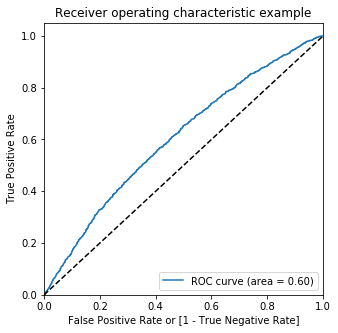

In [329]:
# Call the ROC function

draw_roc(y_train_pred_final.Default, y_train_pred_final.Default_Prob)

In [330]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.564148,1,1,1,1,1,1,1,0,0,0,0
1,0,0.569499,1,1,1,1,1,1,1,0,0,0,0
2,0,0.365151,0,1,1,1,1,0,0,0,0,0,0
3,0,0.681046,1,1,1,1,1,1,1,1,0,0,0
4,0,0.653181,1,1,1,1,1,1,1,1,0,0,0


In [331]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500459  1.000000  0.000917
0.2   0.2  0.500789  0.999829  0.001749
0.3   0.3  0.503583  0.999019  0.008148
0.4   0.4  0.541508  0.896186  0.186831
0.5   0.5  0.575722  0.561644  0.589800
0.6   0.6  0.539226  0.195171  0.883281
0.7   0.7  0.500256  0.004906  0.995606
0.8   0.8  0.500000  0.000000  1.000000
0.9   0.9  0.500000  0.000000  1.000000


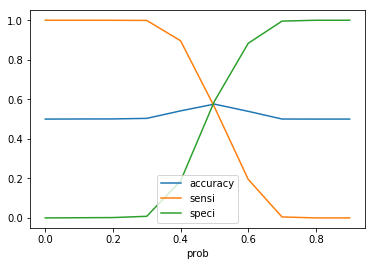

In [332]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [333]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.564148,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.569499,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.365151,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.681046,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.653181,1,1,1,1,1,1,1,1,0,0,0,1


In [334]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.575722025510857

In [335]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted)
confusion2

array([[27651, 19231],
       [20551, 26331]], dtype=int64)

In [336]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [337]:
# Calculate Sensitivity

TP/(TP+FN)

0.561644127810247

In [338]:
# Calculate Specificity

TN/(TN+FP)

0.5897999232114671

In [339]:
X_test = X_test[X_train.columns]

In [340]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [341]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [342]:
y_test_pred[:10]

37031    0.566932
58016    0.560755
5851     0.592150
5330     0.348261
35397    0.347012
18983    0.490766
36425    0.636806
11256    0.400283
4614     0.476985
14509    0.487248
dtype: float64

In [343]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [344]:
# Let's see the head

y_pred_1.head()

,0
37031,0.566932
58016,0.560755
5851,0.592150
5330,0.348261
35397,0.347012


In [345]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [346]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [347]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [348]:
# Check 'y_pred_final'

y_pred_final.head()

,Performance Tag,0
0,0,0.566932
1,0,0.560755
2,0,0.592150
3,0,0.348261
4,0,0.347012


In [349]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Default_Prob'})

In [350]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob
0,0,0.566932
1,0,0.560755
2,0,0.592150
3,0,0.348261
4,0,0.347012


In [351]:
# Make predictions on the test set using 0.5 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [352]:
# Check y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob,final_predicted
0,0,0.566932,1
1,0,0.560755,1
2,0,0.592150,1
3,0,0.348261,0
4,0,0.347012,0


In [353]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Performance Tag'], y_pred_final.final_predicted)

0.5886169552979342

In [354]:
confusion2 = metrics.confusion_matrix(y_pred_final['Performance Tag'], y_pred_final.final_predicted )
confusion2

array([[11829,  8209],
       [  414,   509]], dtype=int64)

In [355]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [356]:
# Calculate sensitivity
TP / float(TP+FN)

0.551462621885157

In [357]:
# Calculate specificity
TN / float(TN+FP)

0.5903283760854376

In [358]:
confusion = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.Predicted)
confusion

array([[27651, 19231],
       [20551, 26331]], dtype=int64)

In [359]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5779158070321759

In [360]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.561644127810247

In [361]:
from sklearn.metrics import precision_recall_curve

In [362]:
y_train_pred_final.Default, y_train_pred_final.Predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        1
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
         ..
 93734    1
 93735    1
 93736    1
 93737    1
 93738    1
 93739    1
 93740    1
 93741    1
 93742    1
 93743    1
 93744    1
 93745    1
 93746    1
 93747    1
 93748    1
 93749    1
 93750    1
 93751    1
 93752    1
 93753    1
 93754    1
 93755    1
 93756    1
 93757    1
 93758    1
 93759    1
 93760    1
 93761    1
 93762    1
 93763    1
 Name: Default, Length: 93764, dtype: int32, 0        1
 1        1
 2        0
 3        1
 4        1
 5        1
 6        0
 7        1
 8        1
 9        1
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18     

In [363]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Default, y_train_pred_final.Default_Prob)

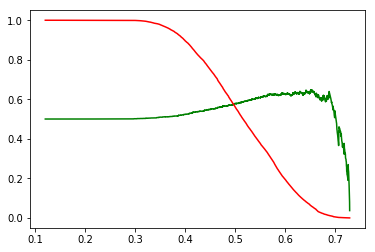

In [364]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [365]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.564148,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.569499,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.365151,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.681046,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.653181,1,1,1,1,1,1,1,1,0,0,0,1


In [366]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.575722025510857

In [367]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted)
confusion2

array([[27651, 19231],
       [20551, 26331]], dtype=int64)

In [368]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [369]:
# Calculate Precision

TP/(TP+FP)

0.5779158070321759

In [370]:
# Calculate Recall

TP/(TP+FN)

0.561644127810247

In [371]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [372]:
y_test_pred[:10]

37031    0.566932
58016    0.560755
5851     0.592150
5330     0.348261
35397    0.347012
18983    0.490766
36425    0.636806
11256    0.400283
4614     0.476985
14509    0.487248
dtype: float64

In [373]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [374]:
# Let's see the head

y_pred_1.head()

,0
37031,0.566932
58016,0.560755
5851,0.592150
5330,0.348261
35397,0.347012


In [375]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [376]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [377]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [378]:
# Check 'y_pred_final'

y_pred_final.head()

,Performance Tag,0
0,0,0.566932
1,0,0.560755
2,0,0.592150
3,0,0.348261
4,0,0.347012


In [379]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Default_Prob'})

In [380]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob
0,0,0.566932
1,0,0.560755
2,0,0.592150
3,0,0.348261
4,0,0.347012


In [381]:
# Make predictions on the test set using 0.5 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [382]:
# Check y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob,final_predicted
0,0,0.566932,1
1,0,0.560755,1
2,0,0.592150,1
3,0,0.348261,0
4,0,0.347012,0


In [383]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Performance Tag'], y_pred_final.final_predicted)

0.5886169552979342

In [384]:
confusion2 = metrics.confusion_matrix(y_pred_final['Performance Tag'], y_pred_final.final_predicted)
confusion2

array([[11829,  8209],
       [  414,   509]], dtype=int64)

In [385]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [386]:
# Calculate Precision

TP/(TP+FP)

0.05838495067676072

In [387]:
# Calculate Recall

TP/(TP+FN)

0.551462621885157

#### It's clear from the results that although the model behaves same on both train and test data. The accuracy of the model is poor. Such a model will not work for us.

#### It seems clear that demographic data alone cannot be used to predict the default rate. Lets see how the logistic regression behaves on merged dataset.

## Logistic Regression on merged dataset

In [388]:
# Putting feature variables to X
X = woe_df.drop(['Performance Tag'],axis=1) 

# Putting response variable to y
y = woe_df['Performance Tag']

In [389]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [390]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (48906, 35)
Number transactions y_train dataset:  (48906,)
Number transactions X_test dataset:  (20961, 35)
Number transactions y_test dataset:  (20961,)


In [391]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2024
Before OverSampling, counts of label '0': 46882 

After OverSampling, the shape of train_X: (93764, 35)
After OverSampling, the shape of train_y: (93764,) 

After OverSampling, counts of label '1': 46882
After OverSampling, counts of label '0': 46882


In [392]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

In [393]:
# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

X_train_RF = X_train_res
y_train_RF = y_train_res
X_test_RF = X_test
y_test_RF = y_test

In [394]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93728
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59908.
Date:                Mon, 23 Sep 2019   Deviance:                   1.1982e+05
Time:                        22:02:50   Pearson chi2:                 9.43e+04
No. Iterations:                    21   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -63.9574   4.31e+04     -0.001      0.999   -8.46e+04    8.45e+04
income_WoE                        0.1696      0.038      4.468      0.000       0.095       0.244
nmcr_WoE                         -0.2638      0.033     -7.982      0.000      -0.329      -0.199
nmcc_WoE                          0.2471      0.050      4.902      0.000       0.148       0.346
90DPD6_WoE                        0.2612      0.047      5.559      0.000       0.169       0.353
60DPD6_WoE                       -0.0721      0.065     -1.118      0.264      -0.199       0.054
30DPD6_WoE                        0.1940      0.062      3.143      0.002       0.073       0.315
90DPD12_WoE                       0.0424      0.036      1.164      0.244      -0.029       0.114
60DPD12_WoE                      -0.1770      0.046     -3.828      0.000      -0.268      -0.086
30DPD12_WoE                       0.1924      0.049      3.964      0.000       0.097       0.288
avgcc_WoE                         0.4884      0.021     23.260      0.000       0.447       0.530
tradeslast6_WoE                   0.1306      0.036      3.617      0.000       0.060       0.201
tradeslast12_WoE                  0.1147      0.044      2.600      0.009       0.028       0.201
PLtradeslast6_WoE                 0.1007      0.035      2.864      0.004       0.032       0.170
PLtradeslast12_WoE                0.2716      0.037      7.410      0.000       0.200       0.343
inquirieslast6_WoE                0.0233      0.029      0.804      0.421      -0.034       0.080
inquirieslast12_WoE               0.2230      0.024      9.270      0.000       0.176       0.270
OutstandingBalance_WoE            0.1000      0.030      3.331      0.001       0.041       0.159
totaltrades_WoE                  -0.2351      0.039     -6.057      0.000      -0.311      -0.159
Gender_F                         -5.7374      1.740     -3.296      0.001      -9.149      -2.326
Gender_M                         -5.6845      1.740     -3.266      0.001      -9.096      -2.273
Relationship_Married             23.1377    3.4e+04      0.001      0.999   -6.67e+04    6.67e+04
Relationship_Single              23.1391    3.4e+04      0.001      0.999   -6.67e+04    6.67e+04
Education_Bachelor                1.7165      0.277      6.207      0.000       1.174       2.258
Education_Masters                 1.7622      0.276      6.375      0.000       1.220       2.304
Education_Others                  1.2454      0.342      3.645      0.000       0.576       1.915
Education_Phd                     1.6177      0.278      5.824      0.000       1.073       2.162
Education_Professional            1.7841      0.276      6.454      0.000       1.242       2.326
Profession_SAL                   22.6660   1.63e+04      0.001      0.999   -3.19e+04    3.19e+04
Profession_SE             

In [395]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Manmeet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [396]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('income_WoE', False, 5),
 ('nmcr_WoE', True, 1),
 ('nmcc_WoE', True, 1),
 ('90DPD6_WoE', True, 1),
 ('60DPD6_WoE', False, 12),
 ('30DPD6_WoE', False, 6),
 ('90DPD12_WoE', False, 14),
 ('60DPD12_WoE', False, 4),
 ('30DPD12_WoE', False, 3),
 ('avgcc_WoE', True, 1),
 ('tradeslast6_WoE', False, 7),
 ('tradeslast12_WoE', False, 9),
 ('PLtradeslast6_WoE', False, 11),
 ('PLtradeslast12_WoE', True, 1),
 ('inquirieslast6_WoE', False, 15),
 ('inquirieslast12_WoE', True, 1),
 ('OutstandingBalance_WoE', False, 10),
 ('totaltrades_WoE', False, 8),
 ('Gender_F', True, 1),
 ('Gender_M', True, 1),
 ('Relationship_Married', True, 1),
 ('Relationship_Single', False, 2),
 ('Education_Bachelor', True, 1),
 ('Education_Masters', True, 1),
 ('Education_Others', True, 1),
 ('Education_Phd', True, 1),
 ('Education_Professional', True, 1),
 ('Profession_SAL', True, 1),
 ('Profession_SE', True, 1),
 ('Profession_SE_PROF', True, 1),
 ('Residence_Company provided', False, 13),
 ('Residence_Living with Parents',

In [397]:
col = X_train.columns[rfe.support_]

In [398]:
X_train = X_train[col]

#### Accessing the model with StatsModels

###### Model #1

In [399]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93743
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60007.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2001e+05
Time:                        22:03:20   Pearson chi2:                 9.42e+04
No. Iterations:                    21   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -19.3877   1.63e+04     -0.001      0.999    -3.2e+04     3.2e+04
nmcr_WoE        

In [400]:
X_train.drop('Relationship_Married', axis=1, inplace=True)

###### Model #2

In [401]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93744
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60007.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2001e+05
Time:                        22:03:25   Pearson chi2:                 9.42e+04
No. Iterations:                    21   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -19.3864   1.63e+04     -0.001      0.999    -3.2e+04     3.2e+04
nmcr_WoE        

###### Model #3

In [402]:
X_train.drop('Profession_SAL', axis=1, inplace=True)

In [403]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93745
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60013.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2003e+05
Time:                        22:03:30   Pearson chi2:                 9.42e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.3221      1.764      1.883      0.060      -0.136       6.780
nmcr_WoE        

###### Model #4

In [404]:
X_train.drop('Residence_Others', axis=1, inplace=True)

In [405]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93746
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60014.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2003e+05
Time:                        22:03:34   Pearson chi2:                 9.42e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.3125      1.764      1.877      0.060      -0.146       6.771
nmcr_WoE        

###### Model #5

In [406]:
X_train.drop('Profession_SE', axis=1, inplace=True)

In [407]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93747
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60016.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2003e+05
Time:                        22:03:36   Pearson chi2:                 9.42e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.3093      1.764      1.876      0.061      -0.149       6.767
nmcr_WoE        

###### Model #6

In [408]:
X_train.drop('Gender_M', axis=1, inplace=True)

In [409]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93748
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60029.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2006e+05
Time:                        22:03:40   Pearson chi2:                 9.37e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.1537      0.278     -7.745      0.000      -2.699      -1.609
nmcr_WoE        

###### Model #7

In [410]:
X_train.drop('Residence_Rented', axis=1, inplace=True)

In [411]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93749
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60110.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2022e+05
Time:                        22:03:42   Pearson chi2:                 9.38e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.7371      0.276     -6.298      0.000      -2.278      -1.197
nmcr_WoE        

###### Model #8

In [412]:
X_train.drop('Residence_Owned', axis=1, inplace=True)

In [413]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
print("\n\n",vif_check(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                93764
Model:                            GLM   Df Residuals:                    93750
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60110.
Date:                Mon, 23 Sep 2019   Deviance:                   1.2022e+05
Time:                        22:03:44   Pearson chi2:                 9.38e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.7368      0.276     -6.300      0.000      -2.277      -1.196
nmcr_WoE        

In [414]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.674241
1    0.395372
2    0.272851
3    0.479135
4    0.717453
5    0.634183
6    0.282045
7    0.340776
8    0.562980
9    0.415101
dtype: float64

In [415]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67424149, 0.39537227, 0.27285093, 0.47913491, 0.71745277,
       0.63418256, 0.28204487, 0.3407761 , 0.56297995, 0.41510134])

In [416]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Default':np.squeeze(y_train.values), 'Default_Prob':y_train_pred})
y_train_pred_final.head()

,Default,Default_Prob
0,0,0.674241
1,0,0.395372
2,0,0.272851
3,0,0.479135
4,0,0.717453


In [417]:
y_train_pred_final['Predicted'] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Default,Default_Prob,Predicted
0,0,0.674241,1
1,0,0.395372,0
2,0,0.272851,0
3,0,0.479135,0
4,0,0.717453,1


In [418]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.Predicted)
print(confusion)

[[27128 19754]
 [13710 33172]]


In [419]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [420]:
# Calculate the sensitivity

TP/(TP+FN)

0.7075636704918732

In [421]:
# Calculate the specificity

TN/(TN+FP)

0.5786442557911352

In [422]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Default, y_train_pred_final.Default_Prob, drop_intermediate = False)

In [423]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

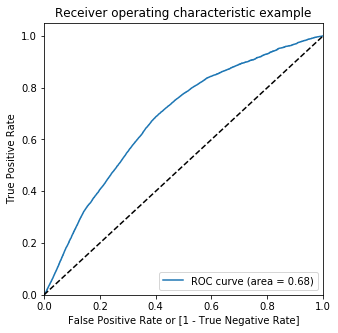

In [424]:
# Call the ROC function

draw_roc(y_train_pred_final.Default, y_train_pred_final.Default_Prob)

In [425]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.674241,1,1,1,1,1,1,1,1,0,0,0
1,0,0.395372,0,1,1,1,1,0,0,0,0,0,0
2,0,0.272851,0,1,1,1,0,0,0,0,0,0,0
3,0,0.479135,0,1,1,1,1,1,0,0,0,0,0
4,0,0.717453,1,1,1,1,1,1,1,1,1,0,0


In [426]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500352  1.000000  0.000704
0.2   0.2  0.501024  1.000000  0.002048
0.3   0.3  0.596231  0.889382  0.303080
0.4   0.4  0.630178  0.819120  0.441235
0.5   0.5  0.643104  0.707564  0.578644
0.6   0.6  0.611823  0.460262  0.763385
0.7   0.7  0.526140  0.097585  0.954695
0.8   0.8  0.500000  0.000000  1.000000
0.9   0.9  0.500000  0.000000  1.000000


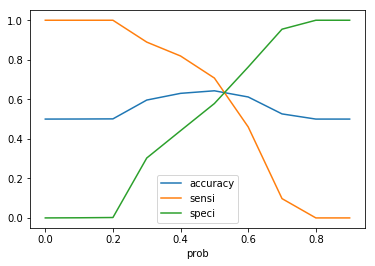

In [427]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [428]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.674241,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.395372,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.272851,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.479135,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.717453,1,1,1,1,1,1,1,1,1,0,0,1


In [429]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.6338360138219359

In [430]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted)
confusion2

array([[30781, 16101],
       [18232, 28650]], dtype=int64)

In [431]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [432]:
# Calculate Sensitivity

TP/(TP+FN)

0.6111087410946632

In [433]:
# Calculate Specificity

TN/(TN+FP)

0.6565632865492087

In [434]:
X_test = X_test[X_train.columns]

In [435]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [436]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [437]:
y_test_pred[:10]

37031    0.634924
58016    0.291579
5851     0.599575
5330     0.391266
35397    0.532086
18983    0.252619
36425    0.589607
11256    0.281834
4614     0.440815
14509    0.317008
dtype: float64

In [438]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [439]:
# Let's see the head

y_pred_1.head()

,0
37031,0.634924
58016,0.291579
5851,0.599575
5330,0.391266
35397,0.532086


In [440]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [441]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [442]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [443]:
# Check 'y_pred_final'

y_pred_final.head()

,Performance Tag,0
0,0,0.634924
1,0,0.291579
2,0,0.599575
3,0,0.391266
4,0,0.532086


In [444]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Default_Prob'})

In [445]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob
0,0,0.634924
1,0,0.291579
2,0,0.599575
3,0,0.391266
4,0,0.532086


In [446]:
# Make predictions on the test set using 0.55 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.55 else 0)

In [447]:
# Check y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob,final_predicted
0,0,0.634924,1
1,0,0.291579,0
2,0,0.599575,1
3,0,0.391266,0
4,0,0.532086,0


In [448]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Performance Tag'], y_pred_final.final_predicted)

0.6516387576928582

In [449]:
confusion2 = metrics.confusion_matrix(y_pred_final['Performance Tag'], y_pred_final.final_predicted )
confusion2

array([[13123,  6915],
       [  387,   536]], dtype=int64)

In [450]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [451]:
# Calculate sensitivity
TP / float(TP+FN)

0.580715059588299

In [452]:
# Calculate specificity
TN / float(TN+FP)

0.6549056792095019

In [453]:
confusion = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.Predicted)
confusion

array([[27128, 19754],
       [13710, 33172]], dtype=int64)

In [454]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6267618939651589

In [455]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7075636704918732

In [456]:
y_train_pred_final.Default, y_train_pred_final.Predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        1
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
         ..
 93734    1
 93735    1
 93736    1
 93737    1
 93738    1
 93739    1
 93740    1
 93741    1
 93742    1
 93743    1
 93744    1
 93745    1
 93746    1
 93747    1
 93748    1
 93749    1
 93750    1
 93751    1
 93752    1
 93753    1
 93754    1
 93755    1
 93756    1
 93757    1
 93758    1
 93759    1
 93760    1
 93761    1
 93762    1
 93763    1
 Name: Default, Length: 93764, dtype: int32, 0        1
 1        0
 2        0
 3        0
 4        1
 5        1
 6        0
 7        0
 8        1
 9        0
 10       0
 11       0
 12       1
 13       1
 14       0
 15       1
 16       0
 17       0
 18     

In [457]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Default, y_train_pred_final.Default_Prob)

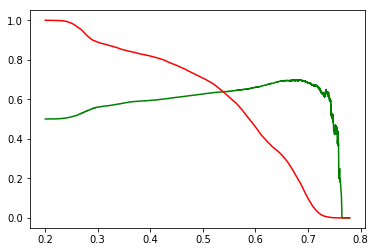

In [458]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [459]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Default_Prob.map(lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

,Default,Default_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.674241,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.395372,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.272851,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.479135,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.717453,1,1,1,1,1,1,1,1,1,0,0,1


In [460]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Default, y_train_pred_final.final_predicted)

0.6429226568832388

In [461]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Default, y_train_pred_final.final_predicted)
confusion2

array([[28534, 18348],
       [15133, 31749]], dtype=int64)

In [462]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [463]:
# Calculate Precision

TP/(TP+FP)

0.6337505239834721

In [464]:
# Calculate Recall

TP/(TP+FN)

0.6772108698434367

In [465]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [466]:
y_test_pred[:10]

37031    0.634924
58016    0.291579
5851     0.599575
5330     0.391266
35397    0.532086
18983    0.252619
36425    0.589607
11256    0.281834
4614     0.440815
14509    0.317008
dtype: float64

In [467]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [468]:
# Let's see the head

y_pred_1.head()

,0
37031,0.634924
58016,0.291579
5851,0.599575
5330,0.391266
35397,0.532086


In [469]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [470]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [471]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [472]:
# Check 'y_pred_final'

y_pred_final.head()

,Performance Tag,0
0,0,0.634924
1,0,0.291579
2,0,0.599575
3,0,0.391266
4,0,0.532086


In [473]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Default_Prob'})

In [474]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob
0,0,0.634924
1,0,0.291579
2,0,0.599575
3,0,0.391266
4,0,0.532086


In [475]:
# Make predictions on the test set using 0.52 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Default_Prob.map(lambda x: 1 if x > 0.52 else 0)

In [476]:
# Check y_pred_final

y_pred_final.head()

,Performance Tag,Default_Prob,final_predicted
0,0,0.634924,1
1,0,0.291579,0
2,0,0.599575,1
3,0,0.391266,0
4,0,0.532086,1


In [477]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Performance Tag'], y_pred_final.final_predicted)

0.6067458613615763

In [478]:
confusion2 = metrics.confusion_matrix(y_pred_final['Performance Tag'], y_pred_final.final_predicted)
confusion2

array([[12125,  7913],
       [  330,   593]], dtype=int64)

In [479]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [480]:
# Calculate Precision

TP/(TP+FP)

0.06971549494474488

In [481]:
# Calculate Recall

TP/(TP+FN)

0.6424702058504875

#### There is a increase in the accuracy of the model when we use all the parameters to design a model. However, still the model is very acccurate.

#### So, we will now use other techniques like Random Forest to see how the data behaves.

# Random Forest

In [482]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [483]:
# Putting feature variables to X
X = woe_df.drop(['Performance Tag'],axis=1) 

# Putting response variable to y
y = woe_df['Performance Tag']

In [484]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [485]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (48906, 35)
Number transactions y_train dataset:  (48906,)
Number transactions X_test dataset:  (20961, 35)
Number transactions y_test dataset:  (20961,)
Before OverSampling, counts of label '1': 2024
Before OverSampling, counts of label '0': 46882 

After OverSampling, the shape of train_X: (93764, 35)
After OverSampling, the shape of train_y: (93764,) 

After OverSampling, counts of label '1': 46882
After OverSampling, counts of label '0': 46882


In [486]:
# Converting the resultant oversampled data to a dataframe
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

# Syncing the columns
X_train_res.columns = X_train.columns 

# Converting back to standard name
X_train = X_train_res
y_train = y_train_res

In [487]:
# fit
rfc.fit(X_train_res,y_train_res)

C:\Users\Manmeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [488]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Making predictions
predictions = rfc.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20038
           1       0.08      0.00      0.00       923

    accuracy                           0.95     20961
   macro avg       0.52      0.50      0.49     20961
weighted avg       0.92      0.95      0.93     20961



In [489]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[20015    23]
 [  921     2]]


In [490]:
print(accuracy_score(y_test,predictions))

0.9549639807261104


In [491]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Max Depth

In [492]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

max_depths = np.linspace(1, 32, 32, endpoint=True)
# parameters to build the model on
parameters = {'max_depth': max_depths}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [493]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.189389,0.006487,0.015095,0.001047,1,{'max_depth': 1.0},0.651808,0.665671,0.664249,0.670808,...,0.662162,0.006538,32,0.661205,0.664845,0.664174,0.661228,0.653189,0.660928,0.004146
1,0.271192,0.006924,0.012162,0.006115,2,{'max_depth': 2.0},0.667378,0.680388,0.681847,0.682541,...,0.678181,0.005556,31,0.681656,0.682602,0.683731,0.670373,0.673985,0.678469,0.005302
2,0.527666,0.142054,0.024281,0.008599,3,{'max_depth': 3.0},0.691213,0.710995,0.715230,0.719923,...,0.710667,0.010132,30,0.722410,0.707386,0.713699,0.707447,0.709593,0.712107,0.005640
3,0.571921,0.182933,0.024984,0.012483,4,{'max_depth': 4.0},0.713554,0.749867,0.755279,0.765518,...,0.746470,0.017540,29,0.749660,0.746700,0.752053,0.752053,0.736069,0.747307,0.005954
4,0.603953,0.138780,0.028112,0.011688,5,{'max_depth': 5.0},0.740002,0.797963,0.772238,0.793249,...,0.784310,0.026522,28,0.786828,0.789575,0.767357,0.778902,0.799552,0.784443,0.010798


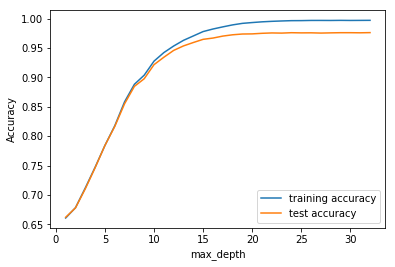

In [494]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [495]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

n_estimators = [1, 5, 30, 50, 80, 100, 150]

# parameters to build the model on
parameters = {'n_estimators': n_estimators}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [496]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096552,0.013568,0.003590,0.002998,1,{'n_estimators': 1},0.716487,0.749174,0.750000,0.733042,...,0.738268,0.012469,7,0.756033,0.740835,0.742175,0.723311,0.732429,0.738956,0.010889
1,0.567095,0.175136,0.018013,0.006765,5,{'n_estimators': 5},0.780740,0.836408,0.839537,0.827805,...,0.823536,0.021748,6,0.848047,0.824890,0.831587,0.816749,0.823575,0.828970,0.010638
2,2.622052,0.728941,0.065155,0.023346,30,{'n_estimators': 30},0.811027,0.870214,0.873560,0.873027,...,0.860490,0.024776,5,0.884629,0.856526,0.863662,0.857943,0.858956,0.864343,0.010422
3,4.391195,0.414588,0.132968,0.044872,50,{'n_estimators': 50},0.812947,0.878746,0.869027,0.875213,...,0.864404,0.026315,4,0.888362,0.864338,0.860582,0.861942,0.868608,0.868766,0.010170
4,6.583531,0.580743,0.209906,0.064931,80,{'n_estimators': 80},0.812787,0.879012,0.868761,0.882253,...,0.865183,0.026692,3,0.886322,0.864031,0.859516,0.864302,0.866581,0.868150,0.009370


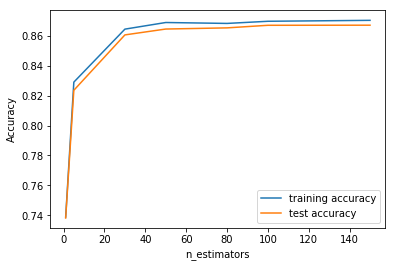

In [497]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Max Features

In [498]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [0.25,0.50,0.75]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [499]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.220597,0.399752,0.027799,0.013365,0.25,{'max_features': 0.25},0.810280,0.873520,0.885559,0.893825,...,0.873885,0.033548,3,0.886455,0.858965,0.874207,0.876660,0.885645,0.876386,0.009954
1,2.383673,0.735043,0.028119,0.011686,0.5,{'max_features': 0.5},0.835022,0.920177,0.905930,0.907477,...,0.900783,0.034539,2,0.926956,0.898094,0.891497,0.887511,0.910681,0.902948,0.014347
2,3.534203,0.417579,0.032324,0.013066,0.75,{'max_features': 0.75},0.840567,0.953983,0.929714,0.934407,...,0.921046,0.041151,1,0.934662,0.929196,0.911148,0.910334,0.922639,0.921596,0.009650


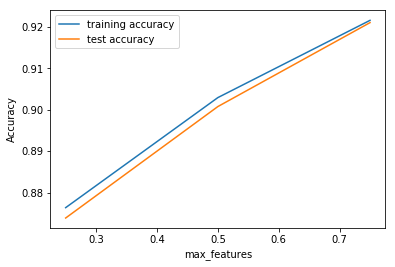

In [500]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [501]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': [30, 60, 90, 120, 150, 180]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [502]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.349133,0.374046,0.052574,0.018056,30,{'min_samples_leaf': 30},0.872987,0.979471,0.974136,0.979202,...,0.956380,0.041745,1,0.976390,0.956272,0.956807,0.958567,0.956594,0.960926,0.007773
1,1.381018,0.414938,0.034649,0.011240,60,{'min_samples_leaf': 60},0.862856,0.963474,0.960644,0.966297,...,0.943774,0.040508,2,0.963845,0.944154,0.943022,0.944982,0.944955,0.948192,0.007859
2,1.134722,0.346499,0.034374,0.018207,90,{'min_samples_leaf': 90},0.856137,0.949877,0.942619,0.943579,...,0.927190,0.035620,3,0.952326,0.928596,0.929238,0.924772,0.925892,0.932165,0.010216
3,1.150854,0.420874,0.028125,0.011699,120,{'min_samples_leaf': 120},0.846486,0.936654,0.930781,0.939846,...,0.917740,0.035748,4,0.942528,0.915411,0.917173,0.921239,0.918360,0.922942,0.009975
4,1.080099,0.303323,0.043740,0.015300,150,{'min_samples_leaf': 150},0.847446,0.932174,0.924061,0.922035,...,0.908536,0.030937,5,0.935609,0.911878,0.908201,0.904762,0.899923,0.912075,0.012410


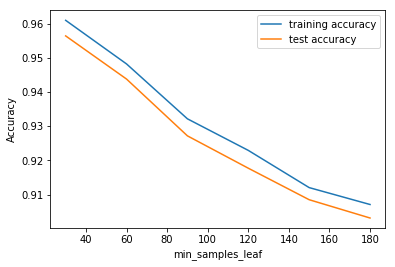

In [503]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [504]:

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': [0.1, 0.25, 0.5, 0.75, 1.0]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,
                    cv=n_folds, 
                   scoring="accuracy")

rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [505]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.707276,0.231716,0.021867,0.007654,0.1,{'min_samples_split': 0.1},0.734190,0.763730,0.793622,0.773944,...,0.768835,0.019819,1,0.776990,0.757472,0.785634,0.760812,0.764691,0.769120,0.010573
1,0.384286,0.121642,0.015624,0.009894,0.25,{'min_samples_split': 0.25},0.673563,0.699584,0.709044,0.707605,...,0.697155,0.012763,2,0.696214,0.699707,0.706367,0.696022,0.690183,0.697698,0.005304
2,0.372595,0.025587,0.028369,0.005749,0.5,{'min_samples_split': 0.5},0.654154,0.663858,0.652997,0.678434,...,0.663229,0.009281,3,0.663472,0.663138,0.655935,0.666480,0.661068,0.662018,0.003498
3,0.090820,0.005596,0.010848,0.005735,0.75,{'min_samples_split': 0.75},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.000000,4,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
4,0.093733,0.000040,0.009360,0.007643,1,{'min_samples_split': 1.0},0.500000,0.500000,0.500000,0.500000,...,0.500000,0.000000,4,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


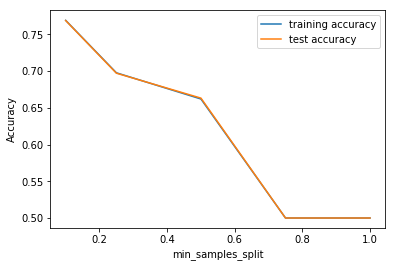

In [506]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [507]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [4,8,12, 16],
    'min_samples_leaf': [40, 60, 80],
    'min_samples_split': [0.1, 0.25, 0.5, 0.75, 1.0],
    'n_estimators': [5, 30, 50, 80], 
    'max_features': [0.25,0.50,0.75]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [508]:
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 29.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [509]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.865118808924534 using {'max_depth': 12, 'max_features': 0.75, 'min_samples_leaf': 80, 'min_samples_split': 0.1, 'n_estimators': 30}


In [510]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=16,
                             min_samples_leaf=40, 
                             min_samples_split=0.1,
                             max_features=0.75,
                             n_estimators=50)

In [511]:
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features=0.75, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [512]:
# predict
predictions = rfc.predict(X_test)

In [513]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [514]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     20038
           1       0.07      0.07      0.07       923

    accuracy                           0.92     20961
   macro avg       0.51      0.51      0.51     20961
weighted avg       0.92      0.92      0.92     20961



In [515]:
print(confusion_matrix(y_test,predictions))

[[19141   897]
 [  856    67]]


In [516]:
# Using same DF without Smote

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features=0.75, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [517]:
# predict
predictions = rfc.predict(X_test)

In [518]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [519]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     20038
           1       0.07      0.09      0.08       923

    accuracy                           0.90     20961
   macro avg       0.51      0.52      0.51     20961
weighted avg       0.92      0.90      0.91     20961



In [520]:
print(confusion_matrix(y_test,predictions))

[[18864  1174]
 [  836    87]]


### Evaluting using SVM Model

In [522]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 60)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [ 1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

In [ ]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:
# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")

### Creating the Scorecard

##### Using Random Forest for scorecard

In [ ]:
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), reverse=True))

In [ ]:
# Finding the important features in random forest
coeficients = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), reverse=True))
coeficients

In [ ]:
# Renaming columns of the dataframe

coeficients = coeficients.rename(columns={0: "Coff", 1: "Variable"})

# Keep only those features which has value more than 0

coeficients = coeficients.loc[coeficients["Coff"] > 0]

In [ ]:
coeficients

In [ ]:
coeficients = coeficients.set_index("Variable")
coeficients

In [ ]:
# Setting Scorecard with the original dataframe

scorecard = woe_df

In [ ]:
# Filtering only those features which are important

scorecard = scorecard[coeficients.index]

In [ ]:
scorecard.head()

In [ ]:
# Calculate the Score using cofficients

scorecard = scorecard[coeficients.index].apply(lambda x:x*coeficients['Coff'].T, axis=1)

In [ ]:
scorecard.head()

In [ ]:
scorecard["logit"] = scorecard[list(scorecard.columns)].sum(axis=1)
scorecard['logit'].head()

In [ ]:
# Convert Log Ratio and generate probabilities

scorecard['odds'] = np.exp(scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [ ]:
# Getting the Variables

target = 400
odds = 10
doubleOdds = 20

In [ ]:
# Factor and Offset Calculation

factor = doubleOdds / np.log(2)
offset = target - factor * np.log(odds)

In [ ]:
# Final Score Calculation
scorecard['score'] = offset + factor * scorecard['logit']

In [ ]:
# Adding performance tag variable

scorecard['Performance Tag'] = woe_df['Performance Tag']

In [ ]:
# Round off the scores

scorecard['score'] = round(scorecard['score'], 2)
scorecard.head()

In [ ]:
scorecard['score'].describe()

In [ ]:
### Plot the Distribution of Final Scorecard with a CutOff Score 
plt.figure(figsize=(16, 8))

plt.hist(scorecard['score'],bins=150, edgecolor='black', color='#317DC2', linewidth=1.5)

plt.title('Scorecard Distribution', fontweight='bold', fontsize=16)
plt.axvline(scorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Cutoff Score is: ",scorecard['score'].mean())

In [ ]:
### Max and Min Score

print("Max Score is: ", scorecard.score.max())
print("Min Score is: ", scorecard.score.min())

In [ ]:
# Plot Scores Against Predicted Odds (Exponential Relationship)

plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='odds',
            data=scorecard,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds')
plt.show()

In [ ]:
# Plot Scores Against Probabilities

plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='probs',
            data=scorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)')
plt.show()

In [ ]:
# Filter out Default Applicants

scorecard['Performance Tag'] = scorecard['Performance Tag'].astype(int)
DefDF = scorecard.loc[scorecard['Performance Tag'] == 1]

In [ ]:
# Mean Score of Default Applicants

print("Mean Score of Approved Applicants is: ", round(DefDF.score.mean(), 2))

In [ ]:
### Max and Min Score of Approved Candidate

print("Max Score is: ", DefDF.score.max())
print("Min Score is: ", DefDF.score.min())

In [ ]:
# Plot Default Applicants Score Histogram

plt.figure(figsize=(16, 8))

plt.hist(DefDF['score'],bins=150, edgecolor='black', color='#317DC2', linewidth=1.5)

plt.title('Default Applicants Score Distribution', fontweight='bold', fontsize=16)

plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Filter out Non default Candidates

NonDF = scorecard.loc[scorecard['Performance Tag'] == 0]

In [ ]:
# Print shape of Non default Candidates

NonDF.shape

In [ ]:
print("Mean Score of Non Default Applicants is: ", round(NonDF.score.mean(), 2))

In [ ]:
print("Max Score is: ", NonDF.score.max())
print("Min Score is: ", NonDF.score.min())

In [ ]:
#### Plot Approved Applicants Score Histogram
plt.figure(figsize=(16, 8))

plt.hist(NonDF['score'],bins=150, edgecolor='black', color='#317DC2', linewidth=1.5)

plt.title('Non default Score Distribution', fontweight='bold', fontsize=16)

plt.xlabel('Score')
plt.ylabel('count')
plt.show()

#### Checking the reject data

In [ ]:
# Filter the reject data

score_reject = woe_df_reject
score_reject = score_reject[coeficients.index]
score_reject.head()

In [ ]:
### Calculating the Score

score_reject = score_reject[coeficients.index].apply(lambda x:x*coeficients['Coff'].T, axis=1)

In [ ]:
score_reject["logit"] = score_reject[list(score_reject.columns)].sum(axis=1)
score_reject['logit'].head()

In [ ]:
### Converting Log Ratio and creating probabilities
score_reject['odds'] = np.exp(score_reject['logit'])
score_reject['probs'] = score_reject['odds'] / (score_reject['odds'] + 1)


In [ ]:
### Getting the Variables
target = 400
odds = 10
doubleOdds = 20

In [ ]:
### Factor and Offset Calculation
factor = doubleOdds / np.log(2)
offset = target - factor * np.log(odds)

In [ ]:
### Final Score Calculation
score_reject['score'] = offset + factor * score_reject['logit']

In [ ]:
### Getting the Actual Response in score_reject DF
score_reject['Performance Tag'] = woe_df_reject['Performance Tag']

In [ ]:
### Rounding off the Scores by 2 places of Decimel
score_reject['score'] = round(score_reject['score'], 2)
score_reject.head()

In [ ]:
score_reject['score'].describe()

In [ ]:
### Plot the Distribution of Final Scorecard with a CutOff Score 
plt.figure(figsize=(16, 8))

plt.hist(score_reject['score'],bins=150, edgecolor='black', color='#317DC2', linewidth=1.5)

plt.title('Distribution of Scorecard', fontweight='bold', fontsize=16)
plt.axvline(score_reject['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

It appears that a good number of people who were not consider for credit card has good credit score. So, we can use this metric to filter out candidates and decide whether they qualify for a card or not.